## Number of CR species over time

In [2]:
import requests
import pandas as pd

# # Define the base URL and your API token
# base_url = "https://api.iucnredlist.org/api/v4/red_list_categories"
# token = "TVXuHMNVpyvNRFTdwx8SED3kt5mPNJ3W1QJL"

# # Set up the headers with the token
# headers = {
#     "accept": "application/json",
#     "Authorization": token
# }

# # List of threat categories
# threat_categories = ["DD", "LC", "NT", "VU", "EN", "CR", "EW", "EX", "NE"]

# # Initialize an empty list to hold all the data
# all_data = []

# for category in threat_categories:
#     # Initialize variables for pagination
#     page = 1
#     per_page = 100

#     while True:
#         print(f"Fetching page {page} for category {category}")
#         # Construct the URL with pagination parameters
#         url = f"{base_url}/{category}?page={page}&per_page={per_page}"
        
#         # Make the GET request
#         response = requests.get(url, headers=headers)
        
#         # Check if the request was successful
#         if response.status_code == 200:
#             data = response.json()
#             assessments = data.get('assessments', [])
            
#             # Add assessments to the list with the threat category
#             for assessment in assessments:
#                 assessment["Threat"] = category
#             all_data.extend(assessments)
            
#             # Check if we have reached the last page
#             total_pages = int(response.headers.get('total-pages', 1))
#             if page >= total_pages:
#                 break
            
#             # Move to the next page
#             page += 1
#         else:
#             print(f"Failed to retrieve data for category {category}: {response.status_code} - {response.text}")
#             break

# # Extract relevant information for each assessment
# rows = []
# for assessment in all_data:
#     row = {
#         "year_published": assessment.get("year_published"),
#         "latest": assessment.get("latest"),
#         "sis_taxon_id": assessment.get("sis_taxon_id"),
#         "url": assessment.get("url"),
#         "assessment_id": assessment.get("assessment_id"),
#         "code": assessment.get("code"),
#         "code_type": assessment.get("code_type"),
#         "scope_description": assessment.get("scopes")[0].get("description").get("en") if assessment.get("scopes") else None,
#         "scope_code": assessment.get("scopes")[0].get("code") if assessment.get("scopes") else None,
#         "Threat": assessment.get("Threat")
#     }
#     rows.append(row)

# # Create a DataFrame
# df = pd.DataFrame(rows)

# # Display the DataFrame
# df

# df.to_csv("IUCN_categories.csv")

df = pd.read_csv("IUCN_categories.csv")

In [3]:
df = df.query("scope_description == 'Global'")
df

,Unnamed: 0,year_published,latest,sis_taxon_id,url,assessment_id,code,code_type,scope_description,scope_code,Threat
0,0,2019.0,True,10767,https://www.iucnredlist.org/species/10767/498370,498370,DD,red_list_category,Global,1,DD
1,1,2012.0,True,10803,https://www.iucnredlist.org/species/10803/498726,498726,DD,red_list_category,Global,1,DD
2,2,2014.0,True,11150,https://www.iucnredlist.org/species/11150/500780,500780,DD,red_list_category,Global,1,DD
3,3,2012.0,False,12817,https://www.iucnredlist.org/species/12817/509971,509971,DD,red_list_category,Global,1,DD
4,4,2012.0,False,13392,https://www.iucnredlist.org/species/13392/512698,512698,DD,red_list_category,Global,1,DD
...,...,...,...,...,...,...,...,...,...,...,...
277146,277146,2008.0,False,45068,https://www.iucnredlist.org/species/45068/7084...,70848457,NE,red_list_category,Global,1,NE
277147,277147,2008.0,False,4261,https://www.iucnredlist.org/species/4261/91263808,91263808,NE,red_list_category,Global,1,NE
277148,277148,2017.0,False,9025,https://www.iucnredlist.org/species/9025/12193...,121931994,NE,red_list_category,Global,1,NE
277149,277149,2018.0,False,110229440,https://www.iucnredlist.org/species/110229440/...,128755881,NE,red_list_category,Global,1,NE


/var/folders/c2/89nqvt4n4493kmcyq52w2_7w0000gq/T/ipykernel_11142/883867325.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_published'] = df['year_published'].astype(int)


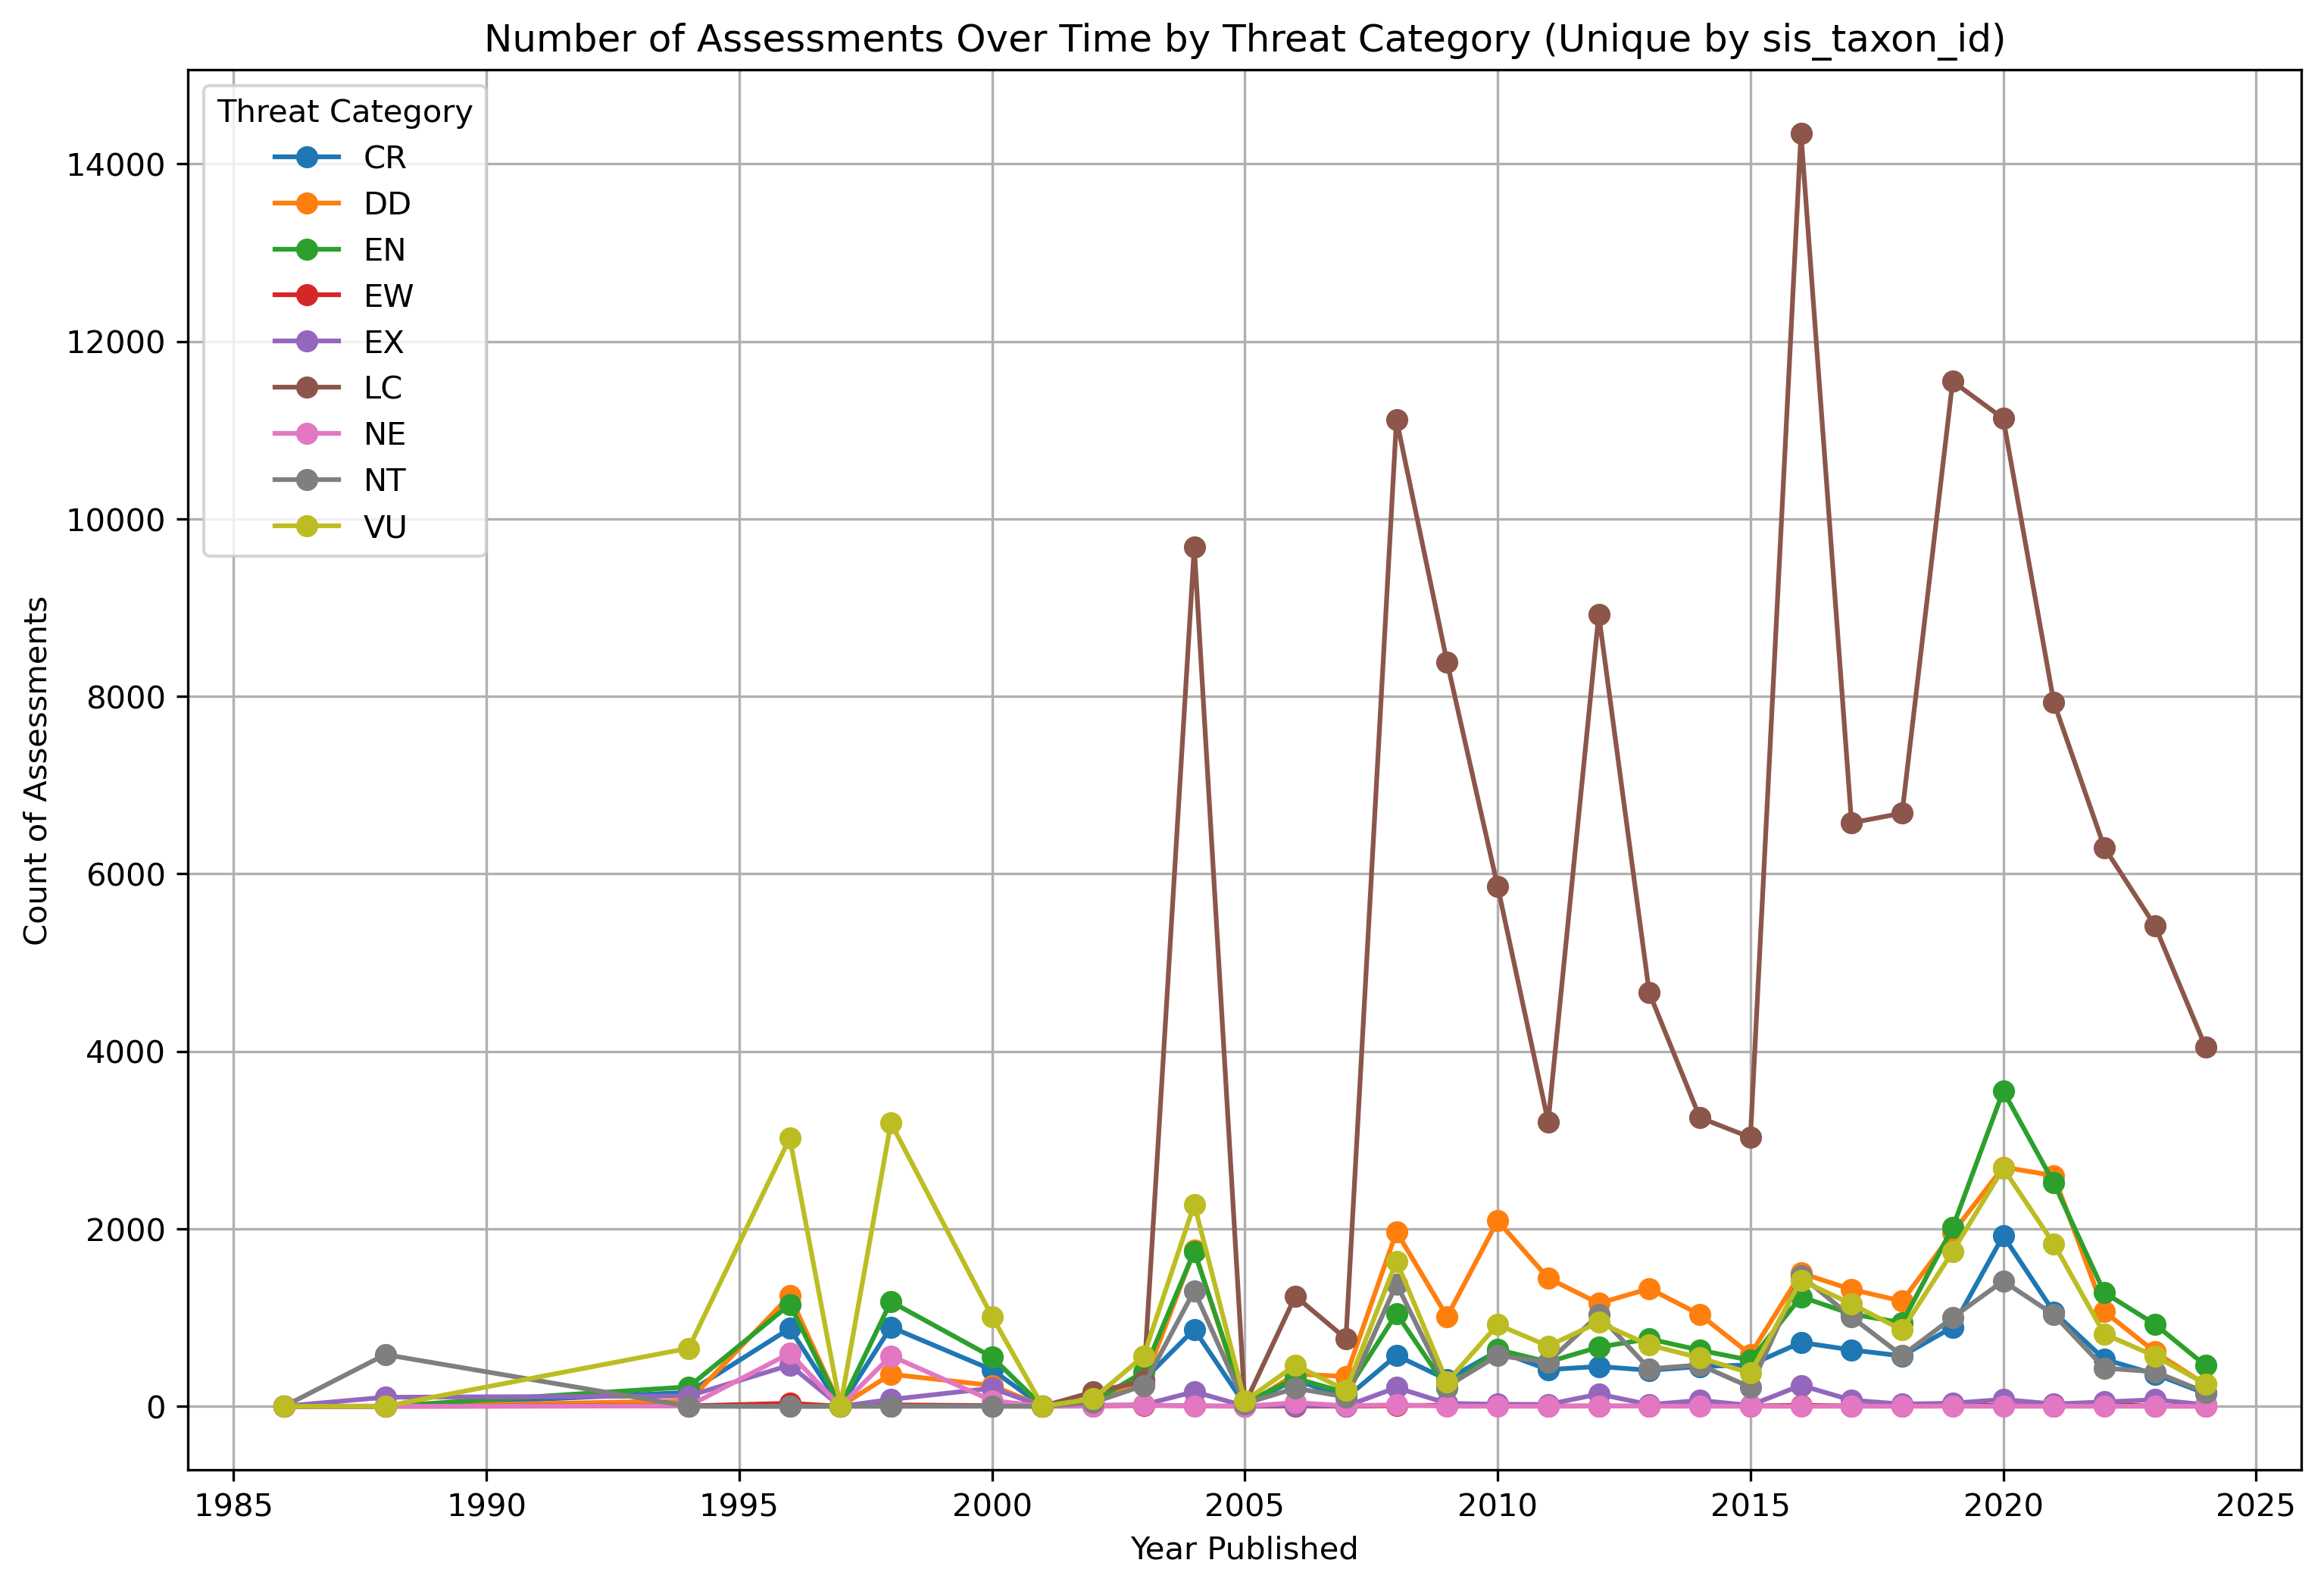

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Drop rows where 'year_published' is None
df = df.dropna(subset=['year_published'])

# Convert 'year_published' to integer if not already
df['year_published'] = df['year_published'].astype(int)

# Drop duplicates based on 'year_published' and 'sis_taxon_id'
df_unique = df.drop_duplicates(subset=['year_published', 'sis_taxon_id'])

# Group by year and Threat and count the number of assessments
df_grouped = df_unique.groupby(['year_published', 'Threat']).size().reset_index(name='count')

# Create a pivot table to have Threat categories as columns
df_pivot = df_grouped.pivot(index='year_published', columns='Threat', values='count').fillna(0)

# Plot the count of assessments over time for each threat category
plt.figure(figsize=(12, 8), dpi=300)

for threat in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[threat], marker='o', label=threat)

plt.title('Number of Assessments Over Time by Threat Category (Unique by sis_taxon_id)')
plt.xlabel('Year Published')
plt.ylabel('Count of Assessments')
plt.legend(title='Threat Category')
plt.grid(True)
plt.show()


## Get marine species

In [5]:
# import requests
# import pandas as pd

# # Define the base URL and your API token
# base_url = "https://api.iucnredlist.org/api/v4/habitats/"
# token = "TVXuHMNVpyvNRFTdwx8SED3kt5mPNJ3W1QJL"

# # Set up the headers with the token
# headers = {
#     "accept": "application/json",
#     "Authorization": token
# }

# # Function to get assessments for a given habitat
# def get_assessments(habitat_id):
#     page = 1
#     per_page = 100
#     assessments = []
    
#     while True:
#         print(f"Habitat: {habitat_id}, Page: {page}")
#         # Construct the URL with pagination parameters
#         url = f"{base_url}{habitat_id}?page={page}&per_page={per_page}"
        
#         # Make the GET request
#         response = requests.get(url, headers=headers)
        
#         # Check if the request was successful
#         if response.status_code == 200:
#             data = response.json()
#             assessments.extend(data.get('assessments', []))
            
#             # Check if we have reached the last page
#             total_pages = int(response.headers.get('total-pages', 1))
#             if page >= total_pages:
#                 break
            
#             # Move to the next page
#             page += 1
#         else:
#             print(f"Failed to retrieve data for habitat {habitat_id}: {response.status_code} - {response.text}")
#             break
            
#     return assessments

# # Initialize variables for storing all assessments
# all_assessments = []

# # Iterate through major categories and their subcategories
# major_habitats = [5, 9, 10, 11, 12, 13]
# for habitat_id in major_habitats:
#     # Get assessments for the main category
#     all_assessments.extend(get_assessments(habitat_id))
    
#     # Check for subcategories (assuming subcategories range from 1 to 15)
#     for sub_id in range(1, 16):
#         sub_habitat_id = f"{habitat_id}_{sub_id}"
#         all_assessments.extend(get_assessments(sub_habitat_id))

# # Extract relevant information for each assessment
# rows = []
# for assessment in all_assessments:
#     row = {
#         "year_published": assessment.get("year_published"),
#         "latest": assessment.get("latest"),
#         "sis_taxon_id": assessment.get("sis_taxon_id"),
#         "url": assessment.get("url"),
#         "assessment_id": assessment.get("assessment_id"),
#         "code": assessment.get("code"),
#         "code_type": assessment.get("code_type"),
#         "scope_description": assessment.get("scopes")[0].get("description").get("en") if assessment.get("scopes") else None,
#         "scope_code": assessment.get("scopes")[0].get("code") if assessment.get("scopes") else None,
#         "habitat_id": assessment.get("habitat_id")  # Add habitat_id to the row
#     }
#     rows.append(row)

# # Create a DataFrame
# marine_df = pd.DataFrame(rows)

# # Display the DataFrame
# marine_df

# marine_df.to_csv("marine_habitats.csv")


In [5]:
marine_df = pd.read_csv("marine_habitats.csv")
marine_df

,Unnamed: 0,year_published,latest,sis_taxon_id,url,assessment_id,code,code_type,scope_description,scope_code,habitat_id
0,0,2016.0,False,14922,https://www.iucnredlist.org/species/14922/546843,546843,5,habitat,Global,1,NaN
1,1,2016.0,False,17315,https://www.iucnredlist.org/species/17315/1380378,1380378,5,habitat,Global,1,NaN
2,2,2014.0,True,199963,https://www.iucnredlist.org/species/199963/262...,2622899,5,habitat,Global,1,NaN
3,3,2008.0,True,134013,https://www.iucnredlist.org/species/134013/389...,3891368,5,habitat,Global,1,NaN
4,4,2008.0,False,135748,https://www.iucnredlist.org/species/135748/419...,4196459,5,habitat,Global,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
251653,251653,2022.0,False,18711,https://www.iucnredlist.org/species/18711/2227...,222719180,13_5,habitat,Global,1,NaN
251654,251654,2024.0,True,163424,https://www.iucnredlist.org/species/163424/222...,222880455,13_5,habitat,Europe,2,NaN
251655,251655,2024.0,True,135673,https://www.iucnredlist.org/species/135673/234...,234016559,13_5,habitat,Global,1,NaN
251656,251656,2023.0,True,166975,https://www.iucnredlist.org/species/166975/244...,244856058,13_5,habitat,Global,1,NaN


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm

df_merged = df_unique.merge(marine_df["sis_taxon_id"], on="sis_taxon_id",how="inner")
df_merged = df_merged.drop_duplicates(subset=['year_published', 'sis_taxon_id'])
df_merged = df_merged[['year_published', 'Threat', 'sis_taxon_id', 'assessment_id']]

# Ensure the dataframe is sorted by sis_taxon_id and year_published
df_merged = df_merged.sort_values(by=['sis_taxon_id', 'year_published'])

# Initialize an empty list to store new rows
new_rows = []

# Define the range of years
years = range(1997, 2025)

# Iterate through each sis_taxon_id
for sis_taxon_id in tqdm(df_merged['sis_taxon_id'].unique()):
    # Filter data for the current sis_taxon_id
    df_sis = df_merged[df_merged['sis_taxon_id'] == sis_taxon_id]
    
    # Iterate through each year in the defined range
    for year in years:
        # Check if there is an entry for the current year
        if year not in df_sis['year_published'].values:
            # Find the most recent threat categorization from a previous year
            previous_threats = df_sis[df_sis['year_published'] < year]
            if not previous_threats.empty:
                last_threat = previous_threats.iloc[-1]['Threat']
                # Create a new row with the current year, sis_taxon_id, and the most recent threat categorization
                new_row = {
                    'year_published': year,
                    'Threat': last_threat,
                    'sis_taxon_id': sis_taxon_id
                }
                new_rows.append(new_row)

# Create a DataFrame from the new rows
df_new_rows = pd.DataFrame(new_rows)

# Append the new rows to the original dataframe
df_combined = pd.concat([df_merged, df_new_rows])

# Sort the combined dataframe
df_combined = df_combined.sort_values(by=['sis_taxon_id', 'year_published']).reset_index(drop=True)

df_combined


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49656/49656 [01:44<00:00, 477.33it/s]


,year_published,Threat,sis_taxon_id,assessment_id
0,1996,DD,9,13090459.0
1,1997,DD,9,NaN
2,1998,DD,9,NaN
3,1999,DD,9,NaN
4,2000,DD,9,NaN
...,...,...,...,...
656162,2023,LC,247788158,61400208.0
656163,2024,LC,247788158,NaN
656164,2024,LC,255004594,239555854.0
656165,2024,LC,257548227,46664179.0


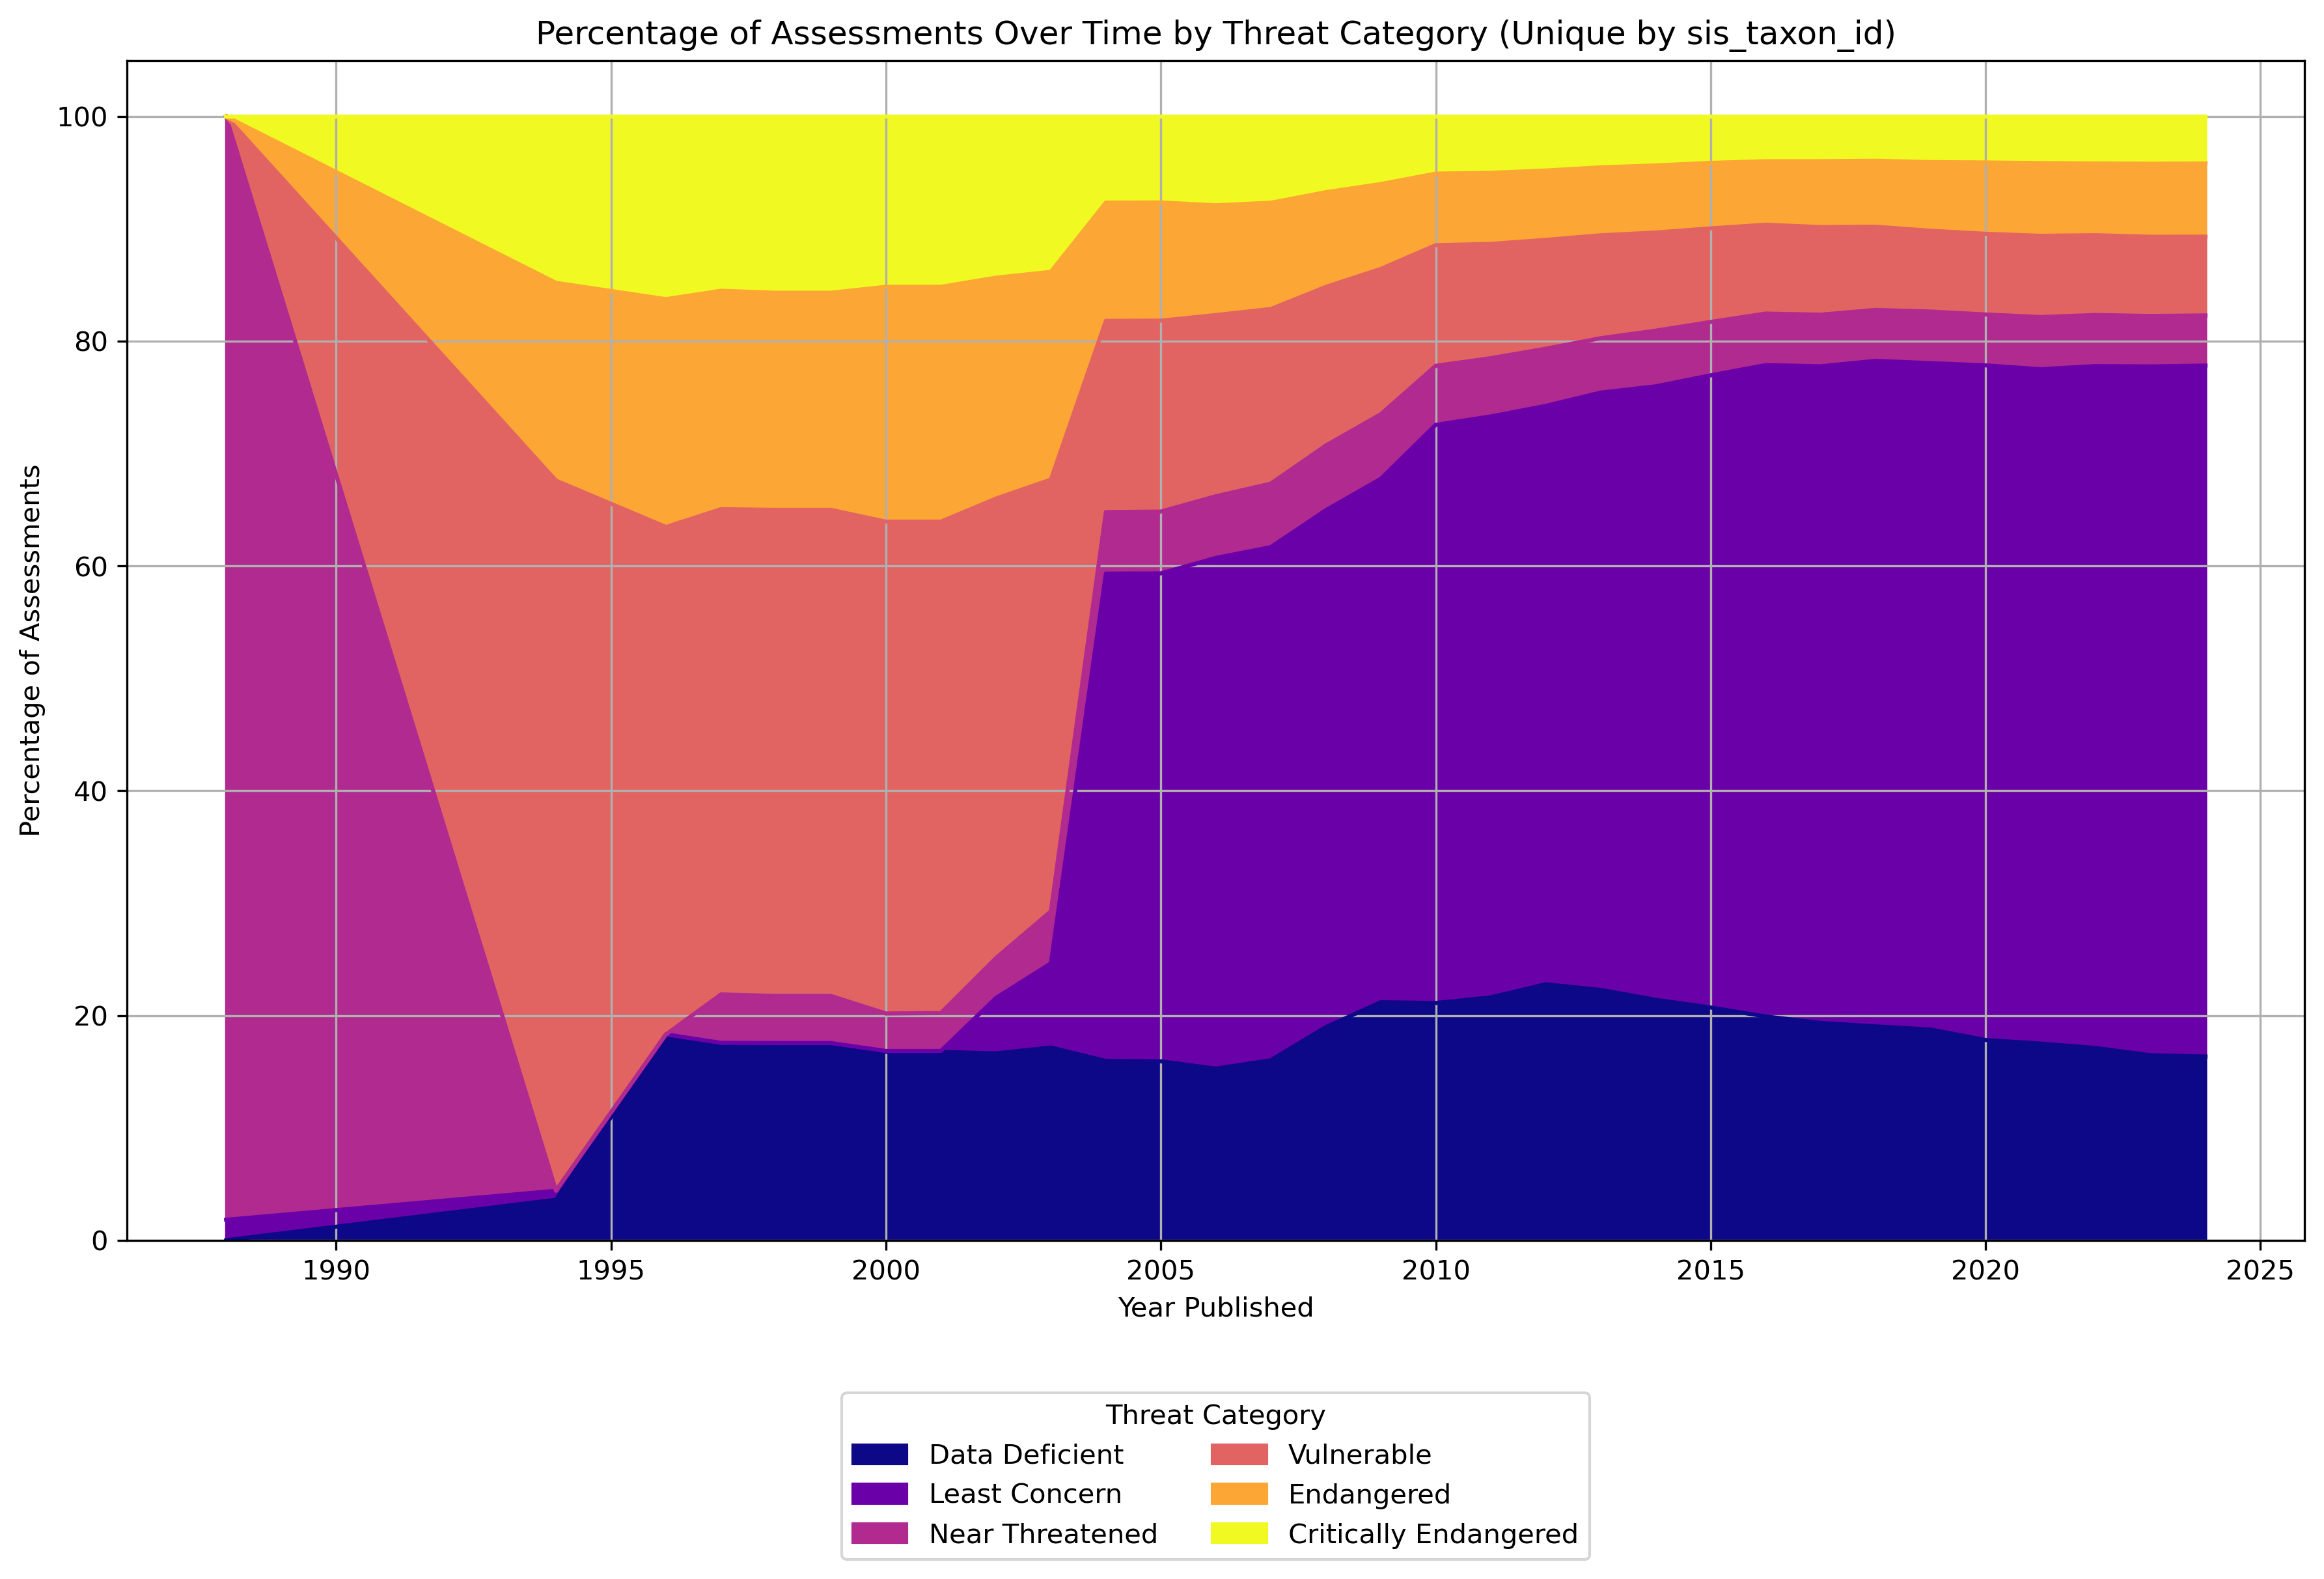

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined is already defined and contains the relevant data

# Group by year and Threat and count the number of assessments
df_grouped = df_combined.groupby(['year_published', 'Threat']).size().reset_index(name='count')

# Mapping dictionary
threats_mapping = {
    'DD': 'Data Deficient',
    'LC': 'Least Concern',
    'NT': 'Near Threatened',
    'VU': 'Vulnerable',
    'EN': 'Endangered',
    'CR': 'Critically Endangered'
}

# Replace the values in the 'Threat' column
df_grouped['Threat'] = df_grouped['Threat'].replace(threats_mapping)

# Create a pivot table to have Threat categories as columns
df_pivot = df_grouped.pivot(index='year_published', columns='Threat', values='count').fillna(0)

# Specify the desired order of Threat categories
threat_order = ['Data Deficient', 'Least Concern', 'Near Threatened', 'Vulnerable', 'Endangered', 'Critically Endangered']
df_pivot = df_pivot[threat_order]

# Convert counts to percentages
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Create the figure with specified DPI
plt.figure(figsize=(12, 8), dpi=300)

# Plot the stacked area chart of assessments over time for each threat category
df_percentage.plot(kind='area', stacked=True, colormap='plasma', ax=plt.gca())

plt.title('Percentage of Assessments Over Time by Threat Category (Unique by sis_taxon_id)')
plt.xlabel('Year Published')
plt.ylabel('Percentage of Assessments')

# Adjust the legend position to be centered below the plot
plt.legend(title='Threat Category', bbox_to_anchor=(0.5, -0.2), loc='center', ncol=2)
plt.grid(True)

# Adjust layout to make sure everything fits well within the figure
plt.tight_layout(rect=[0, 0, 1, 1])

# Adjust subplots to make space for the legend
plt.subplots_adjust(bottom=0.2)

# Set the font to Avenir
plt.rcParams['font.family'] = 'Avenir'

# Save the figure as an SVG file
plt.savefig('../Figures/IUCN_categories.svg', format='svg')

plt.show()


In [8]:
df_percentage.to_csv("threatened_time.csv")

In [9]:
test = df_combined.dropna()
test.loc[test.groupby('sis_taxon_id')['year_published'].idxmax()]

,year_published,Threat,sis_taxon_id,assessment_id
15,2011,CR,9,13090494.0
50,2017,EN,43,14255260.0
76,2014,EX,73,19848542.0
107,2016,EN,75,3139283.0
126,2006,VU,81,13080520.0
...,...,...,...,...
656160,2023,LC,247600869,172215518.0
656162,2023,LC,247788158,61400208.0
656164,2024,LC,255004594,239555854.0
656165,2024,LC,257548227,46664179.0


In [11]:
import requests
import pandas as pd
import time
from tqdm import tqdm

# Define the base URL and your API token
base_url = "https://api.iucnredlist.org/api/v4/assessment"
token = "TVXuHMNVpyvNRFTdwx8SED3kt5mPNJ3W1QJL"

# Set up the headers with the token
headers = {
    "accept": "application/json",
    "Authorization": token
}

# Assuming df_combined is defined elsewhere in your code
assessements_list = df_combined.dropna()
assessements_list = assessements_list.loc[assessements_list.groupby('sis_taxon_id')['year_published'].idxmax()].reset_index(drop=True)

# List of assessment IDs
assessment_ids = assessements_list['assessment_id'].dropna().astype(int).values

# Initialize empty lists to hold all the data if not already defined
try:
    all_data
except NameError:
    all_data = []

try:
    all_data_threats
except NameError:
    all_data_threats = []

# Extract processed assessment_ids from all_data
processed_assessment_ids = {entry["assessment_id"] for entry in all_data}

def fetch_data_with_retry(url, headers, retries=5, backoff_factor=0.5):
    for i in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()
        elif response.status_code == 429:
            wait_time = backoff_factor * (2 ** i)
            print(f"Rate limit exceeded. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
        else:
            print(f"Failed to retrieve data: {response.status_code} - {response.text}")
            break
    return None

for assessment_id in tqdm(assessment_ids):
    # Skip if the assessment_id is already processed
    if assessment_id in processed_assessment_ids:
        continue

    # Construct the URL for the current assessment ID
    url = f"{base_url}/{assessment_id}"
    
    # Fetch the data with retry mechanism
    data = fetch_data_with_retry(url, headers)
    
    if data:
        trend = data.get("population_trend") if data.get("population_trend") is None else data.get("population_trend").get("code")
        class_name = data.get("taxon", {}).get("class_name")
        locations = data.get("locations", [])
        threats = data.get("threats", [])
        status = data.get("red_list_category", {}).get("code")
        year_published = data.get("year_published",[])

        # Add the assessment data to the list
        for location in locations:
            country_code = location.get("code")
            assessment_data = {
                "assessment_id": assessment_id,
                "country_code": country_code,
                "trend": trend,
                "class_name": class_name,
                "status": status,
                "year_published": year_published
            }
            all_data.append(assessment_data)

        # Add the threats data to the list
        for threat in threats:
            threat_code = threat.get("code")
            threat_data = {
                "assessment_id": assessment_id,
                "country_code": country_code,
                "threat_code": threat_code,
                "class_name": class_name
            }
            all_data_threats.append(threat_data)
        
        # Mark the assessment_id as processed
        processed_assessment_ids.add(assessment_id)

# Create DataFrames from the collected data
country_trends_df = pd.DataFrame(all_data)
threats_df = pd.DataFrame(all_data_threats)

# Display the DataFrame
threats_df


  3%|███▊                                                                                                                       | 1552/49656 [13:58<6:31:56,  2.05it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


  3%|████▏                                                                                                                      | 1672/49656 [14:58<6:09:25,  2.16it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


  4%|████▋                                                                                                                      | 1912/49656 [16:57<7:52:34,  1.68it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


  7%|████████▍                                                                                                                  | 3398/49656 [29:56<6:42:26,  1.92it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


  7%|████████▋                                                                                                                  | 3518/49656 [30:55<7:31:54,  1.70it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


  8%|█████████▉                                                                                                                 | 3989/49656 [34:57<6:11:12,  2.05it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


  8%|██████████▏                                                                                                                | 4109/49656 [35:56<6:29:51,  1.95it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


  9%|██████████▍                                                                                                                | 4229/49656 [36:57<6:19:23,  2.00it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


  9%|███████████                                                                                                                | 4468/49656 [38:57<6:27:42,  1.94it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 10%|███████████▉                                                                                                               | 4825/49656 [41:57<6:08:20,  2.03it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 10%|████████████▊                                                                                                              | 5182/49656 [44:52<5:24:10,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 11%|█████████████▋                                                                                                             | 5537/49656 [47:57<6:06:26,  2.01it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 11%|██████████████                                                                                                             | 5657/49656 [48:58<6:16:00,  1.95it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 12%|██████████████▎                                                                                                            | 5777/49656 [49:57<5:33:55,  2.19it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 12%|██████████████▌                                                                                                            | 5897/49656 [50:56<5:58:34,  2.03it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 12%|██████████████▉                                                                                                            | 6017/49656 [51:55<5:48:04,  2.09it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 13%|███████████████▍                                                                                                           | 6256/49656 [53:54<5:55:50,  2.03it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 13%|████████████████                                                                                                           | 6494/49656 [55:57<5:11:27,  2.31it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 14%|████████████████▋                                                                                                          | 6731/49656 [57:57<5:56:37,  2.01it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 15%|█████████████████▌                                                                                                       | 7208/49656 [1:01:55<5:29:23,  2.15it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 15%|██████████████████▏                                                                                                      | 7447/49656 [1:03:56<7:12:50,  1.63it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 16%|███████████████████                                                                                                      | 7801/49656 [1:06:54<5:06:52,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 16%|███████████████████▎                                                                                                     | 7921/49656 [1:07:49<4:56:13,  2.35it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 16%|███████████████████▌                                                                                                     | 8042/49656 [1:08:55<4:39:16,  2.48it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 16%|███████████████████▉                                                                                                     | 8162/49656 [1:09:50<4:29:23,  2.57it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 17%|████████████████████▏                                                                                                    | 8282/49656 [1:10:55<4:56:24,  2.33it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 17%|████████████████████▍                                                                                                    | 8402/49656 [1:11:54<5:25:30,  2.11it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 17%|████████████████████▊                                                                                                    | 8522/49656 [1:12:51<5:10:04,  2.21it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 17%|█████████████████████                                                                                                    | 8642/49656 [1:13:55<5:11:01,  2.20it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 18%|█████████████████████▉                                                                                                   | 9000/49656 [1:16:55<5:46:29,  1.96it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 19%|██████████████████████▌                                                                                                  | 9234/49656 [1:18:53<4:46:40,  2.35it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 19%|██████████████████████▊                                                                                                  | 9354/49656 [1:19:50<5:26:37,  2.06it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 19%|███████████████████████                                                                                                  | 9474/49656 [1:20:52<4:55:07,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 19%|███████████████████████▍                                                                                                 | 9594/49656 [1:21:55<6:06:43,  1.82it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 20%|████████████████████████▌                                                                                               | 10150/49656 [1:26:53<4:26:00,  2.48it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 21%|████████████████████████▊                                                                                               | 10270/49656 [1:27:48<4:13:55,  2.59it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 21%|█████████████████████████                                                                                               | 10391/49656 [1:28:52<4:06:56,  2.65it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 21%|█████████████████████████▍                                                                                              | 10511/49656 [1:29:49<4:19:19,  2.52it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 21%|█████████████████████████▋                                                                                              | 10631/49656 [1:30:45<4:26:51,  2.44it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 22%|█████████████████████████▉                                                                                              | 10752/49656 [1:31:49<4:06:57,  2.63it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 22%|██████████████████████████▎                                                                                             | 10872/49656 [1:32:46<4:15:38,  2.53it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 22%|██████████████████████████▌                                                                                             | 10993/49656 [1:33:51<4:50:42,  2.22it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 22%|██████████████████████████▊                                                                                             | 11113/49656 [1:34:49<4:04:56,  2.62it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 23%|███████████████████████████▏                                                                                            | 11234/49656 [1:35:58<4:13:56,  2.52it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 23%|███████████████████████████▍                                                                                            | 11354/49656 [1:36:48<4:21:11,  2.44it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 23%|████████████████████████████                                                                                            | 11589/49656 [1:38:55<4:38:45,  2.28it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 24%|████████████████████████████▎                                                                                           | 11709/49656 [1:39:57<5:07:38,  2.06it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 24%|████████████████████████████▌                                                                                           | 11829/49656 [1:40:54<4:20:37,  2.42it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 24%|████████████████████████████▉                                                                                           | 11949/49656 [1:41:51<4:56:32,  2.12it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 24%|█████████████████████████████▏                                                                                          | 12069/49656 [1:42:53<5:22:24,  1.94it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 25%|█████████████████████████████▋                                                                                          | 12306/49656 [1:44:57<4:55:19,  2.11it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 25%|██████████████████████████████                                                                                          | 12426/49656 [1:45:57<4:50:01,  2.14it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 26%|██████████████████████████████▌                                                                                         | 12665/49656 [1:47:57<4:32:21,  2.26it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 26%|██████████████████████████████▉                                                                                         | 12785/49656 [1:48:53<4:30:53,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 26%|███████████████████████████████▏                                                                                        | 12905/49656 [1:49:51<4:44:16,  2.15it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 26%|███████████████████████████████▍                                                                                        | 13025/49656 [1:50:53<4:15:28,  2.39it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 26%|███████████████████████████████▊                                                                                        | 13145/49656 [1:51:50<4:23:53,  2.31it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 27%|████████████████████████████████                                                                                        | 13265/49656 [1:52:55<4:32:19,  2.23it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 27%|████████████████████████████████▎                                                                                       | 13385/49656 [1:53:56<5:54:13,  1.71it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 27%|████████████████████████████████▋                                                                                       | 13505/49656 [1:54:50<4:23:02,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 27%|████████████████████████████████▉                                                                                       | 13625/49656 [1:55:48<4:03:45,  2.46it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 28%|█████████████████████████████████▏                                                                                      | 13746/49656 [1:56:57<5:01:40,  1.98it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 29%|██████████████████████████████████▎                                                                                     | 14212/49656 [2:00:55<4:36:38,  2.14it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 30%|███████████████████████████████████▊                                                                                    | 14802/49656 [2:05:58<5:24:29,  1.79it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 30%|████████████████████████████████████                                                                                    | 14922/49656 [2:06:54<4:19:00,  2.24it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 30%|████████████████████████████████████▎                                                                                   | 15042/49656 [2:07:53<4:31:39,  2.12it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 31%|████████████████████████████████████▋                                                                                   | 15162/49656 [2:08:55<4:05:43,  2.34it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 32%|█████████████████████████████████████▉                                                                                  | 15724/49656 [2:13:56<4:41:55,  2.01it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 33%|███████████████████████████████████████                                                                                 | 16188/49656 [2:17:55<4:47:32,  1.94it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 33%|███████████████████████████████████████▍                                                                                | 16308/49656 [2:18:55<4:06:37,  2.25it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 33%|███████████████████████████████████████▋                                                                                | 16428/49656 [2:19:54<3:58:39,  2.32it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 33%|███████████████████████████████████████▉                                                                                | 16548/49656 [2:20:57<3:55:06,  2.35it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 34%|████████████████████████████████████████▌                                                                               | 16788/49656 [2:22:55<3:53:03,  2.35it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 34%|████████████████████████████████████████▊                                                                               | 16908/49656 [2:23:52<4:14:23,  2.15it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 34%|█████████████████████████████████████████▏                                                                              | 17028/49656 [2:24:56<3:57:52,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 35%|█████████████████████████████████████████▍                                                                              | 17148/49656 [2:25:54<4:12:18,  2.15it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 35%|█████████████████████████████████████████▋                                                                              | 17268/49656 [2:26:54<3:41:01,  2.44it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 35%|██████████████████████████████████████████                                                                              | 17388/49656 [2:27:53<3:56:19,  2.28it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 35%|██████████████████████████████████████████▎                                                                             | 17508/49656 [2:28:55<4:16:14,  2.09it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 36%|██████████████████████████████████████████▉                                                                             | 17746/49656 [2:30:53<4:09:22,  2.13it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 36%|███████████████████████████████████████████▏                                                                            | 17866/49656 [2:31:54<3:38:26,  2.43it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 36%|███████████████████████████████████████████▍                                                                            | 17986/49656 [2:32:49<3:34:09,  2.46it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 37%|████████████████████████████████████████████▎                                                                           | 18336/49656 [2:35:50<3:48:26,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 37%|████████████████████████████████████████████▌                                                                           | 18456/49656 [2:36:54<3:53:38,  2.23it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 37%|████████████████████████████████████████████▉                                                                           | 18576/49656 [2:37:52<3:43:10,  2.32it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 38%|█████████████████████████████████████████████▏                                                                          | 18696/49656 [2:38:58<4:04:37,  2.11it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 38%|█████████████████████████████████████████████▍                                                                          | 18816/49656 [2:39:56<4:18:41,  1.99it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 39%|██████████████████████████████████████████████▎                                                                         | 19167/49656 [2:42:52<4:33:48,  1.86it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 39%|██████████████████████████████████████████████▉                                                                         | 19401/49656 [2:44:56<4:08:46,  2.03it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 39%|███████████████████████████████████████████████▏                                                                        | 19521/49656 [2:45:51<3:37:03,  2.31it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 40%|███████████████████████████████████████████████▍                                                                        | 19641/49656 [2:46:55<3:18:09,  2.52it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 40%|███████████████████████████████████████████████▊                                                                        | 19761/49656 [2:47:52<4:08:06,  2.01it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 40%|████████████████████████████████████████████████▎                                                                       | 19993/49656 [2:49:53<4:03:14,  2.03it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 41%|████████████████████████████████████████████████▉                                                                       | 20230/49656 [2:51:56<3:55:43,  2.08it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 41%|█████████████████████████████████████████████████▏                                                                      | 20350/49656 [2:52:55<3:59:14,  2.04it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 41%|█████████████████████████████████████████████████▋                                                                      | 20585/49656 [2:54:54<4:07:45,  1.96it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 42%|██████████████████████████████████████████████████                                                                      | 20705/49656 [2:55:51<3:23:06,  2.38it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 42%|██████████████████████████████████████████████████▎                                                                     | 20825/49656 [2:56:49<3:15:58,  2.45it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 42%|██████████████████████████████████████████████████▌                                                                     | 20945/49656 [2:57:53<4:04:06,  1.96it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 42%|██████████████████████████████████████████████████▉                                                                     | 21065/49656 [2:58:57<3:56:47,  2.01it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 43%|███████████████████████████████████████████████████▏                                                                    | 21185/49656 [2:59:51<3:14:05,  2.44it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 43%|███████████████████████████████████████████████████▍                                                                    | 21305/49656 [3:00:50<3:17:52,  2.39it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 43%|███████████████████████████████████████████████████▊                                                                    | 21425/49656 [3:01:50<3:32:08,  2.22it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 43%|████████████████████████████████████████████████████                                                                    | 21545/49656 [3:02:50<3:08:33,  2.48it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 44%|████████████████████████████████████████████████████▎                                                                   | 21665/49656 [3:03:50<3:19:42,  2.34it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 44%|████████████████████████████████████████████████████▋                                                                   | 21785/49656 [3:04:50<3:11:29,  2.43it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 44%|████████████████████████████████████████████████████▉                                                                   | 21905/49656 [3:05:50<3:24:57,  2.26it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 44%|█████████████████████████████████████████████████████▏                                                                  | 22025/49656 [3:06:51<3:08:27,  2.44it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 45%|█████████████████████████████████████████████████████▌                                                                  | 22145/49656 [3:07:50<3:19:12,  2.30it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 45%|█████████████████████████████████████████████████████▊                                                                  | 22265/49656 [3:08:49<3:00:35,  2.53it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 45%|██████████████████████████████████████████████████████                                                                  | 22385/49656 [3:09:49<3:42:47,  2.04it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 45%|██████████████████████████████████████████████████████▍                                                                 | 22506/49656 [3:10:56<2:53:10,  2.61it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 46%|██████████████████████████████████████████████████████▋                                                                 | 22626/49656 [3:11:48<2:56:41,  2.55it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 46%|███████████████████████████████████████████████████████▎                                                                | 22867/49656 [3:13:57<3:48:58,  1.95it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 46%|███████████████████████████████████████████████████████▌                                                                | 22987/49656 [3:14:57<3:32:20,  2.09it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 47%|███████████████████████████████████████████████████████▊                                                                | 23107/49656 [3:15:56<3:27:14,  2.14it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 47%|████████████████████████████████████████████████████████▍                                                               | 23346/49656 [3:17:56<3:36:51,  2.02it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 47%|████████████████████████████████████████████████████████▉                                                               | 23584/49656 [3:19:55<3:12:07,  2.26it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 48%|█████████████████████████████████████████████████████████▎                                                              | 23704/49656 [3:20:58<3:26:01,  2.10it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 48%|█████████████████████████████████████████████████████████▌                                                              | 23824/49656 [3:21:57<3:32:43,  2.02it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 48%|██████████████████████████████████████████████████████████▏                                                             | 24061/49656 [3:23:56<3:33:17,  2.00it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 49%|██████████████████████████████████████████████████████████▍                                                             | 24181/49656 [3:24:57<3:21:49,  2.10it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 49%|██████████████████████████████████████████████████████████▋                                                             | 24301/49656 [3:25:57<3:11:33,  2.21it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 49%|███████████████████████████████████████████████████████████                                                             | 24421/49656 [3:26:57<3:22:50,  2.07it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 49%|███████████████████████████████████████████████████████████▎                                                            | 24541/49656 [3:27:56<3:15:20,  2.14it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 50%|███████████████████████████████████████████████████████████▉                                                            | 24779/49656 [3:29:57<3:12:36,  2.15it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 50%|████████████████████████████████████████████████████████████▏                                                           | 24899/49656 [3:30:56<3:27:18,  1.99it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 50%|████████████████████████████████████████████████████████████▍                                                           | 25019/49656 [3:31:57<3:39:22,  1.87it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 54%|████████████████████████████████████████████████████████████████▊                                                       | 26835/49656 [3:47:57<3:18:29,  1.92it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 54%|█████████████████████████████████████████████████████████████████▏                                                      | 26955/49656 [3:48:56<2:57:23,  2.13it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 63%|███████████████████████████████████████████████████████████████████████████▍                                            | 31195/49656 [4:26:54<2:22:11,  2.16it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 63%|███████████████████████████████████████████████████████████████████████████▋                                            | 31315/49656 [4:27:54<2:20:38,  2.17it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 63%|███████████████████████████████████████████████████████████████████████████▉                                            | 31435/49656 [4:28:56<2:26:53,  2.07it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 64%|████████████████████████████████████████████████████████████████████████████▎                                           | 31555/49656 [4:29:57<2:23:24,  2.10it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 67%|████████████████████████████████████████████████████████████████████████████████▏                                       | 33164/49656 [4:43:51<1:51:25,  2.47it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 67%|████████████████████████████████████████████████████████████████████████████████▋                                       | 33397/49656 [4:45:57<1:57:57,  2.30it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 69%|██████████████████████████████████████████████████████████████████████████████████▎                                     | 34056/49656 [4:51:56<1:58:27,  2.19it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 69%|██████████████████████████████████████████████████████████████████████████████████▌                                     | 34176/49656 [4:52:57<2:20:36,  1.83it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 70%|███████████████████████████████████████████████████████████████████████████████████▋                                    | 34629/49656 [4:56:57<2:09:55,  1.93it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 71%|████████████████████████████████████████████████████████████████████████████████████▊                                   | 35092/49656 [5:00:55<1:43:22,  2.35it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 73%|███████████████████████████████████████████████████████████████████████████████████████▏                                | 36102/49656 [5:09:51<1:38:36,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 73%|███████████████████████████████████████████████████████████████████████████████████████▌                                | 36222/49656 [5:10:52<1:32:05,  2.43it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 73%|███████████████████████████████████████████████████████████████████████████████████████▊                                | 36342/49656 [5:11:58<1:45:10,  2.11it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 73%|████████████████████████████████████████████████████████████████████████████████████████                                | 36462/49656 [5:12:55<1:46:01,  2.07it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 74%|████████████████████████████████████████████████████████████████████████████████████████▋                               | 36702/49656 [5:14:53<1:42:09,  2.11it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 74%|████████████████████████████████████████████████████████████████████████████████████████▉                               | 36822/49656 [5:15:52<1:36:16,  2.22it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 77%|████████████████████████████████████████████████████████████████████████████████████████████                            | 38081/49656 [5:26:50<1:24:21,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 77%|████████████████████████████████████████████████████████████████████████████████████████████▎                           | 38201/49656 [5:27:49<1:19:22,  2.41it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...
Rate limit exceeded. Retrying in 8.0 seconds...


 77%|████████████████████████████████████████████████████████████████████████████████████████████▉                           | 38435/49656 [5:29:56<1:23:35,  2.24it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▏                          | 38555/49656 [5:30:55<1:31:22,  2.02it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▍                          | 38675/49656 [5:31:57<1:23:50,  2.18it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                          | 38795/49656 [5:32:55<1:16:57,  2.35it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 78%|██████████████████████████████████████████████████████████████████████████████████████████████                          | 38915/49656 [5:33:52<1:15:20,  2.38it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▎                         | 39035/49656 [5:34:51<1:11:10,  2.49it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▌                         | 39155/49656 [5:35:52<1:15:27,  2.32it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▉                         | 39275/49656 [5:36:52<1:11:33,  2.42it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 79%|███████████████████████████████████████████████████████████████████████████████████████████████▏                        | 39395/49656 [5:37:52<1:06:49,  2.56it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 80%|███████████████████████████████████████████████████████████████████████████████████████████████▍                        | 39515/49656 [5:38:52<1:10:19,  2.40it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 39971/49656 [5:42:57<1:13:20,  2.20it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 40207/49656 [5:44:50<1:21:48,  1.93it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 40327/49656 [5:45:57<1:15:45,  2.05it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 41342/49656 [5:54:55<1:20:12,  1.73it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 41568/49656 [5:56:55<59:20,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 41798/49656 [5:58:56<57:39,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 41918/49656 [5:59:56<1:10:43,  1.82it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 42155/49656 [6:01:54<1:02:04,  2.01it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 42275/49656 [6:02:56<57:12,  2.15it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 42748/49656 [6:06:58<55:15,  2.08it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 43091/49656 [6:09:58<1:01:18,  1.78it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 43211/49656 [6:10:57<49:11,  2.18it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████               | 43568/49656 [6:13:58<49:04,  2.07it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 43688/49656 [6:14:56<43:45,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 43925/49656 [6:16:57<47:50,  2.00it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 44045/49656 [6:17:55<40:28,  2.31it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 44165/49656 [6:18:54<39:11,  2.33it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 44285/49656 [6:19:54<46:23,  1.93it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 44523/49656 [6:21:54<35:55,  2.38it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 44643/49656 [6:22:55<44:41,  1.87it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 44763/49656 [6:23:58<36:35,  2.23it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 44883/49656 [6:24:57<35:41,  2.23it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 45121/49656 [6:26:56<36:38,  2.06it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 45241/49656 [6:27:57<35:11,  2.09it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 45477/49656 [6:29:56<35:33,  1.96it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 45597/49656 [6:30:52<30:34,  2.21it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 45836/49656 [6:32:56<26:09,  2.43it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 45956/49656 [6:33:54<25:56,  2.38it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 46076/49656 [6:34:51<30:00,  1.99it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 46315/49656 [6:36:57<26:19,  2.12it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 46435/49656 [6:37:57<22:22,  2.40it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 46555/49656 [6:38:51<23:06,  2.24it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 46675/49656 [6:39:54<22:42,  2.19it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 47031/49656 [6:42:54<21:36,  2.02it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 47151/49656 [6:43:56<24:00,  1.74it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 47389/49656 [6:45:50<18:22,  2.06it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 47623/49656 [6:47:56<15:56,  2.12it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 47743/49656 [6:48:54<15:21,  2.08it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 47863/49656 [6:49:54<13:58,  2.14it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 47983/49656 [6:50:55<13:21,  2.09it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 48103/49656 [6:51:57<11:25,  2.27it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 48564/49656 [6:55:54<07:56,  2.29it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 48802/49656 [6:57:51<07:27,  1.91it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...
Rate limit exceeded. Retrying in 4.0 seconds...


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 49042/49656 [6:59:57<04:58,  2.05it/s]

Rate limit exceeded. Retrying in 0.5 seconds...


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 49162/49656 [7:00:54<03:20,  2.47it/s]

Rate limit exceeded. Retrying in 0.5 seconds...
Rate limit exceeded. Retrying in 1.0 seconds...
Rate limit exceeded. Retrying in 2.0 seconds...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49656/49656 [7:05:11<00:00,  1.95it/s]


,assessment_id,country_code,threat_code,class_name
0,13090494,LA,7_2_10,ACTINOPTERYGII
1,13090494,LA,5_4_1,ACTINOPTERYGII
2,14255260,AU,7_2_8,INSECTA
3,14255260,AU,1_1,INSECTA
4,14255260,AU,2_1_4,INSECTA
...,...,...,...,...
106233,46664179,AE,9_1_2,ACTINOPTERYGII
106234,46664174,IN,5_4_4,ACTINOPTERYGII
106235,46664174,IN,5_4_3,ACTINOPTERYGII
106236,46664174,IN,1_1,ACTINOPTERYGII


In [15]:
# threats_df.to_csv("../Data/all_threats_species.csv")
# country_trends_df.to_csv("../Data/all_trends_species.csv")

In [7]:
from tqdm import tqdm

country_trends_df = pd.read_csv("../Data/all_trends_species.csv")
country_trends_df = country_trends_df[["assessment_id","country_code","status","class_name"]].merge(df_unique[["assessment_id","year_published","sis_taxon_id"]], on="assessment_id", how="inner")

# Mapping dictionary
threats_mapping = {
    'DD': 'Data Deficient',
    'LC': 'Least Concern',
    'NT': 'Near Threatened',
    'VU': 'Vulnerable',
    'EN': 'Endangered',
    'CR': 'Critically Endangered'
}

# Replace the values in the 'Threat' column
country_trends_df['Threat'] = country_trends_df['status'].replace(threats_mapping)

# Initialize an empty list to store new rows
new_rows = []

# Define the range of years
years = range(1997, 2025)

# Iterate through each sis_taxon_id
for sis_taxon_id in tqdm(country_trends_df['sis_taxon_id'].unique()):
    # Filter data for the current sis_taxon_id
    df_sis = country_trends_df[country_trends_df['sis_taxon_id'] == sis_taxon_id]
    
    # Iterate through each year in the defined range
    for year in years:
        # Check if there is an entry for the current year
        if year not in df_sis['year_published'].values:
            # Find the most recent threat categorization from a previous year
            previous_threats = df_sis[df_sis['year_published'] < year]
            if not previous_threats.empty:
                last_threat = previous_threats.iloc[-1]['Threat']
                class_name = previous_threats.iloc[-1]['class_name']
                # Create a new row with the current year, sis_taxon_id, and the most recent threat categorization
                new_row = {
                    'year_published': year,
                    'Threat': last_threat,
                    'sis_taxon_id': sis_taxon_id,
                    'class_name': class_name
                }
                new_rows.append(new_row)

# Create a DataFrame from the new rows
df_new_rows = pd.DataFrame(new_rows)

# Append the new rows to the original dataframe
df_combined = pd.concat([country_trends_df, df_new_rows])

# Sort the combined dataframe
df_combined = df_combined.sort_values(by=['sis_taxon_id', 'year_published']).reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49504/49504 [02:15<00:00, 364.57it/s]


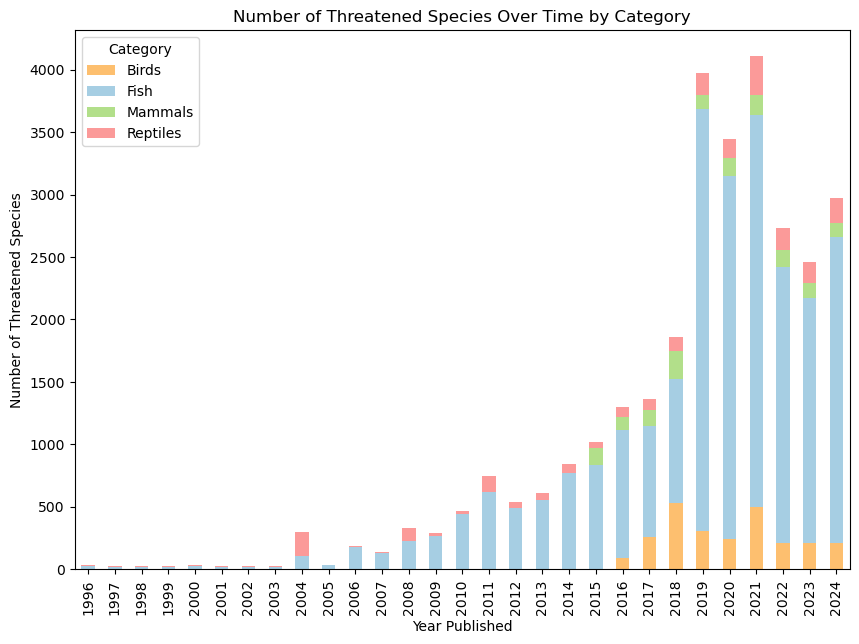

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the mapping
class_to_category = {
    'ACTINOPTERYGII': 'Fish', 
    'CHONDRICHTHYES': 'Fish', 
    'SARCOPTERYGII': 'Fish', 
    'PETROMYZONTI': 'Fish',
    'MYXINI': 'Fish',
    'CEPHALASPIDOMORPHI': 'Fish',
    'MAMMALIA': 'Mammals', 
    'REPTILIA': 'Reptiles', 
    'AVES': 'Birds'
}

# Map the class names to categories
df_combined['category'] = df_combined['class_name'].map(class_to_category)

# Remove rows where category is NaN (those not in the specified classes)
df_combined = df_combined.dropna(subset=['category'])

# Filter the data for specific threats
filtered_df = df_combined[df_combined['Threat'].isin(['Critically Endangered', 'Endangered', 'EW', 'EX'])]

# Create a pivot table to prepare for the plot
pivot_df = filtered_df.pivot_table(index='year_published', columns='category', aggfunc='size', fill_value=0)

# Define the pastel colors
colors = {
    'Fish': '#a6cee3',      # pastel blue
    'Mammals': '#b2df8a',   # pastel green
    'Reptiles': '#fb9a99',  # pastel red
    'Birds': '#fdbf6f'      # pastel yellow
}

# Plot the stacked histogram
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7), color=[colors.get(x, '#ffffff') for x in pivot_df.columns])
plt.title('Number of Threatened Species Over Time by Category')
plt.xlabel('Year Published')
plt.ylabel('Number of Threatened Species')
plt.legend(title='Category')

# Save the plot as a PDF
plt.savefig('threatened_species_histogram.pdf')

# Show the plot
plt.show()


In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the mapping
# phylum_to_category = {
#     'CHORDATA': 'Fish', 
#     'ARTHROPODA': 'Insect', 
#     'CNIDARIA': 'Invertebrate', 
#     'MOLLUSCA': 'Invertebrate', 
#     'ANNELIDA': 'Invertebrate', 
#     'NEMERTEA': 'Invertebrate', 
#     'TRACHEOPHYTA': 'Plant', 
#     'BRYOPHYTA': 'Plant', 
#     'MARCHANTIOPHYTA': 'Plant', 
#     'RHODOPHYTA': 'Plant', 
#     'ASCOMYCOTA': 'Fungus', 
#     'CHLOROPHYTA': 'Plant', 
#     'OCHROPHYTA': 'Plant', 
#     'CHAROPHYTA': 'Plant', 
#     'ECHINODERMATA': 'Invertebrate', 
#     'BASIDIOMYCOTA': 'Fungus', 
#     'PORIFERA': 'Invertebrate'
# }

# # Map the phylum names to categories
# df_combined['category'] = df_combined['phylum_name'].map(phylum_to_category)

# # Filter the data for specific threats
# filtered_df = df_combined[df_combined['Threat'].isin(['Critically Endangered', 'Endangered', 'EW', 'EX'])]

# # Create a pivot table to prepare for the plot
# pivot_df = filtered_df.pivot_table(index='year_published', columns='category', aggfunc='size', fill_value=0)

# # Define the pastel colors
# colors = {
#     'Fish': '#a6cee3',      # pastel blue
#     'Insect': '#b2df8a',    # pastel green
#     'Invertebrate': '#fb9a99',  # pastel red
#     'Plant': '#fdbf6f',     # pastel yellow
#     'Fungus': '#cab2d6'     # pastel purple
# }

# # Plot the stacked histogram
# pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7), color=[colors.get(x, '#ffffff') for x in pivot_df.columns])
# plt.title('Number of Threatened Species Over Time by Category')
# plt.xlabel('Year Published')
# plt.ylabel('Number of Threatened Species')
# plt.legend(title='Category')

# # Save the plot as a PDF
# plt.savefig('threatened_species_histogram.pdf')

# # Show the plot
# plt.show()


In [20]:
pivot_df.to_csv("trends_status.csv")

In [71]:
country_trends_df = pd.read_csv("country_trends.csv")
threats_df = pd.read_csv("country_threats.csv")

# Filter out rows with country codes containing '-'
# df_filtered = country_trends_df[~country_trends_df['country_code'].str.contains('-')]
# df_filtered.to_csv("../Data/filtered_country_trends.csv")


In [80]:
country_trends_df.loc[country_trends_df["trend"] == 0, 'trend_title'] = "Increasing"
country_trends_df.loc[country_trends_df["trend"] == 1, 'trend_title'] = "Decreasing"
country_trends_df.loc[country_trends_df["trend"] == 2, 'trend_title'] = "Stable"
country_trends_df.loc[country_trends_df["trend"] == 3, 'trend_title'] = "Unknown"

import pandas as pd
import pycountry

# Function to convert country code to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return 'Unknown'

# Apply the function to the country_code column
country_trends_df['country_name'] = country_trends_df['country_code'].apply(get_country_name)

country_trends_df = country_trends_df.query("country_name!='Unknown'")
country_trends_df.loc[country_trends_df["trend_title"].isna(), "trend_title"] = "Unknown"

country_trends_df.to_csv("all_country_trends.csv")

country_trends_df

,Unnamed: 0,assessment_id,country_code,trend,trend_title,country_name
0,0,13090494,KH,1.0,Decreasing,Cambodia
1,1,13090494,TH,1.0,Decreasing,Thailand
2,2,13090494,LA,1.0,Decreasing,Lao People's Democratic Republic
5,5,14255260,AU,1.0,Decreasing,Australia
6,6,19848542,IL,NaN,Unknown,Israel
...,...,...,...,...,...,...
560704,560704,46664179,IQ,3.0,Unknown,Iraq
560705,560705,46664179,KW,3.0,Unknown,Kuwait
560706,560706,46664179,QA,3.0,Unknown,Qatar
560707,560707,46664179,AE,3.0,Unknown,United Arab Emirates


In [14]:
country_trends_df = pd.read_csv("all_country_trends.csv")

joint_df = df_combined[['assessment_id','category','country_code']].merge(country_trends_df[['assessment_id','trend_title','country_name','country_code']],on=['country_code','assessment_id'])
joint_df.to_csv("../Data/protect_marine_life_2.csv")

In [19]:
threats_df = pd.read_csv("../Data/all_threats_species.csv")

# Define a function to map threat_code to Threat
def map_threat(threat_code):
    if threat_code.startswith('1_'):
        return 'Residential & commercial development'
    elif threat_code.startswith('2_'):
        return 'Agriculture & aquaculture'
    elif threat_code.startswith('3'):
        return 'Energy production & mining'
    elif threat_code.startswith('4_'):
        return 'Transportation & service corridors'
    elif threat_code.startswith('5_'):
        return 'Biological resource use'
    elif threat_code.startswith('6'):
        return 'Human intrusions & disturbance'
    elif threat_code.startswith('7_'):
        return 'Natural system modifications'
    elif threat_code.startswith('8_'):
        return 'Invasive and other problematic species, genes & diseases'
    elif threat_code.startswith('9_'):
        return 'Pollution'
    elif threat_code.startswith('10_'):
        return 'Geological events'
    elif threat_code.startswith('11_'):
        return 'Climate change & severe weather'
    elif threat_code.startswith('12_'):
        return 'Other'
    else:
        return 'Unknown'  # for any other threat codes

# Apply the function to create the new Threat column
threats_df['Threat'] = threats_df['threat_code'].apply(map_threat)

import pycountry

# Function to convert country code to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return 'Unknown'

# Apply the function to the country_code column
threats_df['country_name'] = threats_df['country_code'].apply(get_country_name)

joint_df = df_combined[['assessment_id','category','country_code']].merge(threats_df[['assessment_id','Threat','country_name','country_code']],on=['country_code','assessment_id'])
joint_df.to_csv("../Data/protect_marine_life_3.csv")

joint_df

,assessment_id,category,country_code,Threat,country_name
0,13090494.0,Fish,LA,Natural system modifications,Lao People's Democratic Republic
1,13090494.0,Fish,LA,Biological resource use,Lao People's Democratic Republic
2,19848542.0,Fish,IL,Natural system modifications,Israel
3,3139283.0,Reptiles,AR,Agriculture & aquaculture,Argentina
4,3139283.0,Reptiles,AR,Climate change & severe weather,Argentina
...,...,...,...,...,...
51086,46664179.0,Fish,AE,Pollution,United Arab Emirates
51087,46664174.0,Fish,IN,Biological resource use,India
51088,46664174.0,Fish,IN,Biological resource use,India
51089,46664174.0,Fish,IN,Residential & commercial development,India


## Trends plot

In [38]:
# import requests
# import pandas as pd

# # Define the base URL and your API token
# base_url = "https://api.iucnredlist.org/api/v4/population_trends/"
# token = "TVXuHMNVpyvNRFTdwx8SED3kt5mPNJ3W1QJL"

# # Set up the headers with the token
# headers = {
#     "accept": "application/json",
#     "Authorization": token
# }

# # Initialize variables for pagination
# all_trends = []

# # Iterate through population trends 0 to 3
# for trend_id in range(4):
#     page = 1
#     per_page = 1000
    
#     while True:
#         print(f"Trend: {trend_id}, Page: {page}")
#         # Construct the URL with pagination parameters
#         url = f"{base_url}{trend_id}?page={page}&per_page={per_page}"
        
#         # Make the GET request
#         response = requests.get(url, headers=headers)
        
#         # Check if the request was successful
#         if response.status_code == 200:
#             data = response.json()
#             trends = data.get('assessments', [])
            
#             # Add assessments to the list with the threat category
#             for trend in trends:
#                 trend["trend"] = trend_id
            
#             # Add trends to the list
#             all_trends.extend(trends)
            
#             # Check if we have reached the last page
#             total_pages = int(response.headers.get('total-pages', 1))
#             if page >= total_pages:
#                 break
            
#             # Move to the next page
#             page += 1
#         else:
#             print(f"Failed to retrieve data for trend {trend_id}: {response.status_code} - {response.text}")
#             break

# # Extract relevant information for each trend
# rows = []
# for trend in all_trends:
#     row = {
#         "year_published": trend.get("year_published"),
#         "latest": trend.get("latest"),
#         "sis_taxon_id": trend.get("sis_taxon_id"),
#         "url": trend.get("url"),
#         "trend": trend.get("trend"),
#         "trend_description": trend.get("trend_description"),
#         "scope_description": trend.get("scopes")[0].get("description").get("en") if trend.get("scopes") else None,
#         "scope_code": trend.get("scopes")[0].get("code") if trend.get("scopes") else None,
#         "population_trend_id": trend.get("population_trend_id")  # Add population_trend_id to the row
#     }
#     rows.append(row)

# # Create a DataFrame
# population_trends_df = pd.DataFrame(rows)

# # Display the DataFrame
# population_trends_df

# population_trends_df.to_csv("IUCN_trends.csv")


In [62]:
population_trends_df = pd.read_csv("IUCN_trends.csv")

population_trends_df.query("scope_description == 'Global'")

population_trends_df = population_trends_df.merge(marine_df["sis_taxon_id"], on="sis_taxon_id",how="inner")

population_trends_df

,Unnamed: 0,year_published,latest,sis_taxon_id,url,trend,trend_description,scope_description,scope_code,population_trend_id
0,8,2013.0,False,152773,https://www.iucnredlist.org/species/152773/676676,0,NaN,Global,1,NaN
1,8,2013.0,False,152773,https://www.iucnredlist.org/species/152773/676676,0,NaN,Global,1,NaN
2,10,2012.0,False,155538,https://www.iucnredlist.org/species/155538/732330,0,NaN,Global,1,NaN
3,10,2012.0,False,155538,https://www.iucnredlist.org/species/155538/732330,0,NaN,Global,1,NaN
4,10,2012.0,False,155538,https://www.iucnredlist.org/species/155538/732330,0,NaN,Global,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1016969,249583,2011.0,True,19857,https://www.iucnredlist.org/species/19857/2580...,3,NaN,Global,1,NaN
1016970,249583,2011.0,True,19857,https://www.iucnredlist.org/species/19857/2580...,3,NaN,Global,1,NaN
1016971,249583,2011.0,True,19857,https://www.iucnredlist.org/species/19857/2580...,3,NaN,Global,1,NaN
1016972,249584,2015.0,True,198291114,https://www.iucnredlist.org/species/198291114/...,3,NaN,Persian Gulf,45433064,NaN


In [48]:
import pandas as pd
import plotly.express as px

country_code = 'AU'  # Assuming country_code is defined
country = "Australia"

# Query the DataFrame for the specified country
test = country_trends_df.query(f"country_code=='{country_code}'")

# Create a new column 'trend_title' with default value "None"
test["trend_title"] = "None"
test.loc[test["trend"] == '0', 'trend_title'] = "Increasing"
test.loc[test["trend"] == '1', 'trend_title'] = "Decreasing"
test.loc[test["trend"] == '2', 'trend_title'] = "Stable"
test.loc[test["trend"] == '3', 'trend_title'] = "Unknown"
test.loc[test["trend"].isna(), 'trend_title'] = "Unknown"

# Count the occurrences of each trend
trend_counts = test['trend_title'].value_counts().reset_index()
trend_counts.columns = ['trend_title', 'count']

# Specify the desired order of Threat categories
trend_order = ['Unknown', 'Decreasing', 'Stable', 'Increasing']
trend_counts['trend_title'] = pd.Categorical(trend_counts['trend_title'], categories=trend_order, ordered=True)
trend_counts = trend_counts.sort_values('trend_title')

# Create a custom color map
colors = ["#d3d3d3", "#ff4500", "#bee7dd", "#2b4a6d"]

# Create a pie chart using Plotly Express
fig = px.pie(trend_counts, names='trend_title', values='count', title=f'{country} trends')

# Center the title
fig.update_layout(title_x=0.5)

# Update the colors
fig.update_traces(marker=dict(colors=colors))

# Show the chart
fig.show()

# Second part: Analyze the threats data
test = threats_df#.query(f"country_code == '{country_code}'")

# Count the occurrences of each threat
threat_counts = test['threat_code'].value_counts().reset_index()
threat_counts.columns = ['threat_code', 'count']

# Define a function to map threat_code to Threat
def map_threat(threat_code):
    if threat_code.startswith('1_'):
        return 'Residential & commercial development'
    elif threat_code.startswith('2_'):
        return 'Agriculture & aquaculture'
    elif threat_code.startswith('3'):
        return 'Energy production & mining'
    elif threat_code.startswith('4_'):
        return 'Transportation & service corridors'
    elif threat_code.startswith('5_'):
        return 'Biological resource use'
    elif threat_code.startswith('6'):
        return 'Human intrusions & disturbance'
    elif threat_code.startswith('7_'):
        return 'Natural system modifications'
    elif threat_code.startswith('8_'):
        return 'Invasive and other problematic species, genes & diseases'
    elif threat_code.startswith('9_'):
        return 'Pollution'
    elif threat_code.startswith('10_'):
        return 'Geological events'
    elif threat_code.startswith('11_'):
        return 'Climate change & severe weather'
    elif threat_code.startswith('12_'):
        return 'Other'
    else:
        return 'Unknown'  # for any other threat codes

# Apply the function to create the new Threat column
threat_counts['Threat'] = threat_counts['threat_code'].apply(map_threat)

# Calculate the percentage of each threat
threat_counts['percentage'] = (threat_counts['count'] / threat_counts['count'].sum()) * 100

# Print out the top 3 threats with their percentage
top_3_threats = threat_counts.nlargest(3, 'count')[['Threat', 'percentage']]

print("\nTop 3 Threats:")
for index, row in top_3_threats.iterrows():
    print(f"{row['Threat']}: {row['percentage']:.2f}%")



/var/folders/c2/89nqvt4n4493kmcyq52w2_7w0000gq/T/ipykernel_23096/4228768050.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Top 3 Threats:
Residential & commercial development: 5.77%
Biological resource use: 4.29%
Pollution: 3.92%


In [52]:
test['Threat'] = test['threat_code'].apply(map_threat)
test

import pandas as pd
import pycountry

# Function to convert country code to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return 'Unknown'

# Apply the function to the country_code column
test['country_name'] = test['country_code'].apply(get_country_name)

test


,Unnamed: 0,assessment_id,country_code,threat_code,Threat,country_name
0,0,13090494,LA,7_2_10,Natural system modifications,Lao People's Democratic Republic
1,1,13090494,LA,5_4_1,Biological resource use,Lao People's Democratic Republic
2,2,14255260,AU,7_2_8,Natural system modifications,Australia
3,3,14255260,AU,1_1,Residential & commercial development,Australia
4,4,14255260,AU,2_1_4,Agriculture & aquaculture,Australia
...,...,...,...,...,...,...
106265,106265,46664179,AE,9_1_2,Pollution,United Arab Emirates
106266,106266,46664174,IN,5_4_4,Biological resource use,India
106267,106267,46664174,IN,5_4_3,Biological resource use,India
106268,106268,46664174,IN,1_1,Residential & commercial development,India


In [53]:
test.to_csv("country_threats.csv")

In [54]:
test = threats_df.query(f"country_code == '{country_code}'")

# Count the occurrences of each trend
trend_counts = test['threat_code'].value_counts().reset_index()
trend_counts.columns = ['threat_code', 'count']

# Define a function to map threat_code to Threat
def map_threat(threat_code):
    if threat_code.startswith('1_'):
        return 'Residential & commercial development'
    elif threat_code.startswith('2_'):
        return 'Agriculture & aquaculture'
    elif threat_code.startswith('3'):
        return 'Energy production & mining'
    elif threat_code.startswith('4_'):
        return 'Transportation & service corridors'
    elif threat_code.startswith('5_'):
        return 'Biological resource use'
    elif threat_code.startswith('6'):
        return 'Human intrusions & disturbance'
    elif threat_code.startswith('7_'):
        return 'Natural system modifications'
    elif threat_code.startswith('8_'):
        return 'Invasive and other problematic species, genes & diseases'
    elif threat_code.startswith('9_'):
        return 'Pollution'
    elif threat_code.startswith('10_'):
        return 'Geological events'
    elif threat_code.startswith('11_'):
        return 'Climate change & severe weather'
    elif threat_code.startswith('12_'):
        return 'Other'
    else:
        return 'Unknown'  # for any other threat codes

# Apply the function to create the new Threat column
trend_counts['Threat'] = trend_counts['threat_code'].apply(map_threat)

# Create a pie chart using Plotly Express
fig = px.pie(trend_counts, names='Threat', values='count', title='Threats Pie Chart')

# Show the chart
fig.show()

In [59]:
# Ensure the country_code column is of string type
country_trends_df['country_code'] = country_trends_df['country_code'].astype(str)

# Filter out rows with country codes containing '-'
df_filtered = country_trends_df[~country_trends_df['country_code'].str.contains('-')]

# Group by country_code and calculate the percent of rows where trend == 3
result = df_filtered.groupby('country_code').apply(lambda x: (x['trend'] == '3').sum() / len(x) * 100).reset_index()

# Rename columns for clarity
result.columns = ['country_code', 'percent_trend_1']

result.sort_values("percent_trend_1")

/var/folders/c2/89nqvt4n4493kmcyq52w2_7w0000gq/T/ipykernel_23096/488714402.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,country_code,percent_trend_1
0,AD,0.0
158,MY,0.0
159,MZ,0.0
160,NC,0.0
161,NE,0.0
...,...,...
89,GR,0.0
90,GS,0.0
91,GT,0.0
78,GD,0.0


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm

df_merged = population_trends_df.drop_duplicates(subset=['year_published', 'sis_taxon_id'])
df_merged = df_merged[['year_published', 'trend', 'sis_taxon_id']]

# Ensure the dataframe is sorted by sis_taxon_id and year_published
df_merged = df_merged.sort_values(by=['sis_taxon_id', 'year_published'])

# Initialize an empty list to store new rows
new_rows = []

# Define the range of years
years = range(1997, 2025)

# Iterate through each sis_taxon_id
for sis_taxon_id in tqdm(df_merged['sis_taxon_id'].unique()):
    # Filter data for the current sis_taxon_id
    df_sis = df_merged[df_merged['sis_taxon_id'] == sis_taxon_id]
    
    # Iterate through each year in the defined range
    for year in years:
        # Check if there is an entry for the current year
        if year not in df_sis['year_published'].values:
            # Find the most recent threat categorization from a previous year
            previous_threats = df_sis[df_sis['year_published'] < year]
            if not previous_threats.empty:
                last_trend = previous_threats.iloc[-1]['trend']
                # Create a new row with the current year, sis_taxon_id, and the most recent threat categorization
                new_row = {
                    'year_published': year,
                    'trend': last_trend,
                    'sis_taxon_id': sis_taxon_id
                }
                new_rows.append(new_row)

# Create a DataFrame from the new rows
df_new_rows = pd.DataFrame(new_rows)

# Append the new rows to the original dataframe
df_combined = pd.concat([df_merged, df_new_rows])

# Sort the combined dataframe
df_combined = df_combined.sort_values(by=['sis_taxon_id', 'year_published']).reset_index(drop=True)

df_combined


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50835/50835 [01:47<00:00, 473.86it/s]


,year_published,trend,sis_taxon_id
0,2011.0,1.0,9
1,2012.0,1.0,9
2,2013.0,1.0,9
3,2014.0,1.0,9
4,2015.0,1.0,9
...,...,...,...
635998,2023.0,3.0,252266143
635999,2024.0,3.0,252266143
636000,2024.0,3.0,255004594
636001,2024.0,3.0,257548227


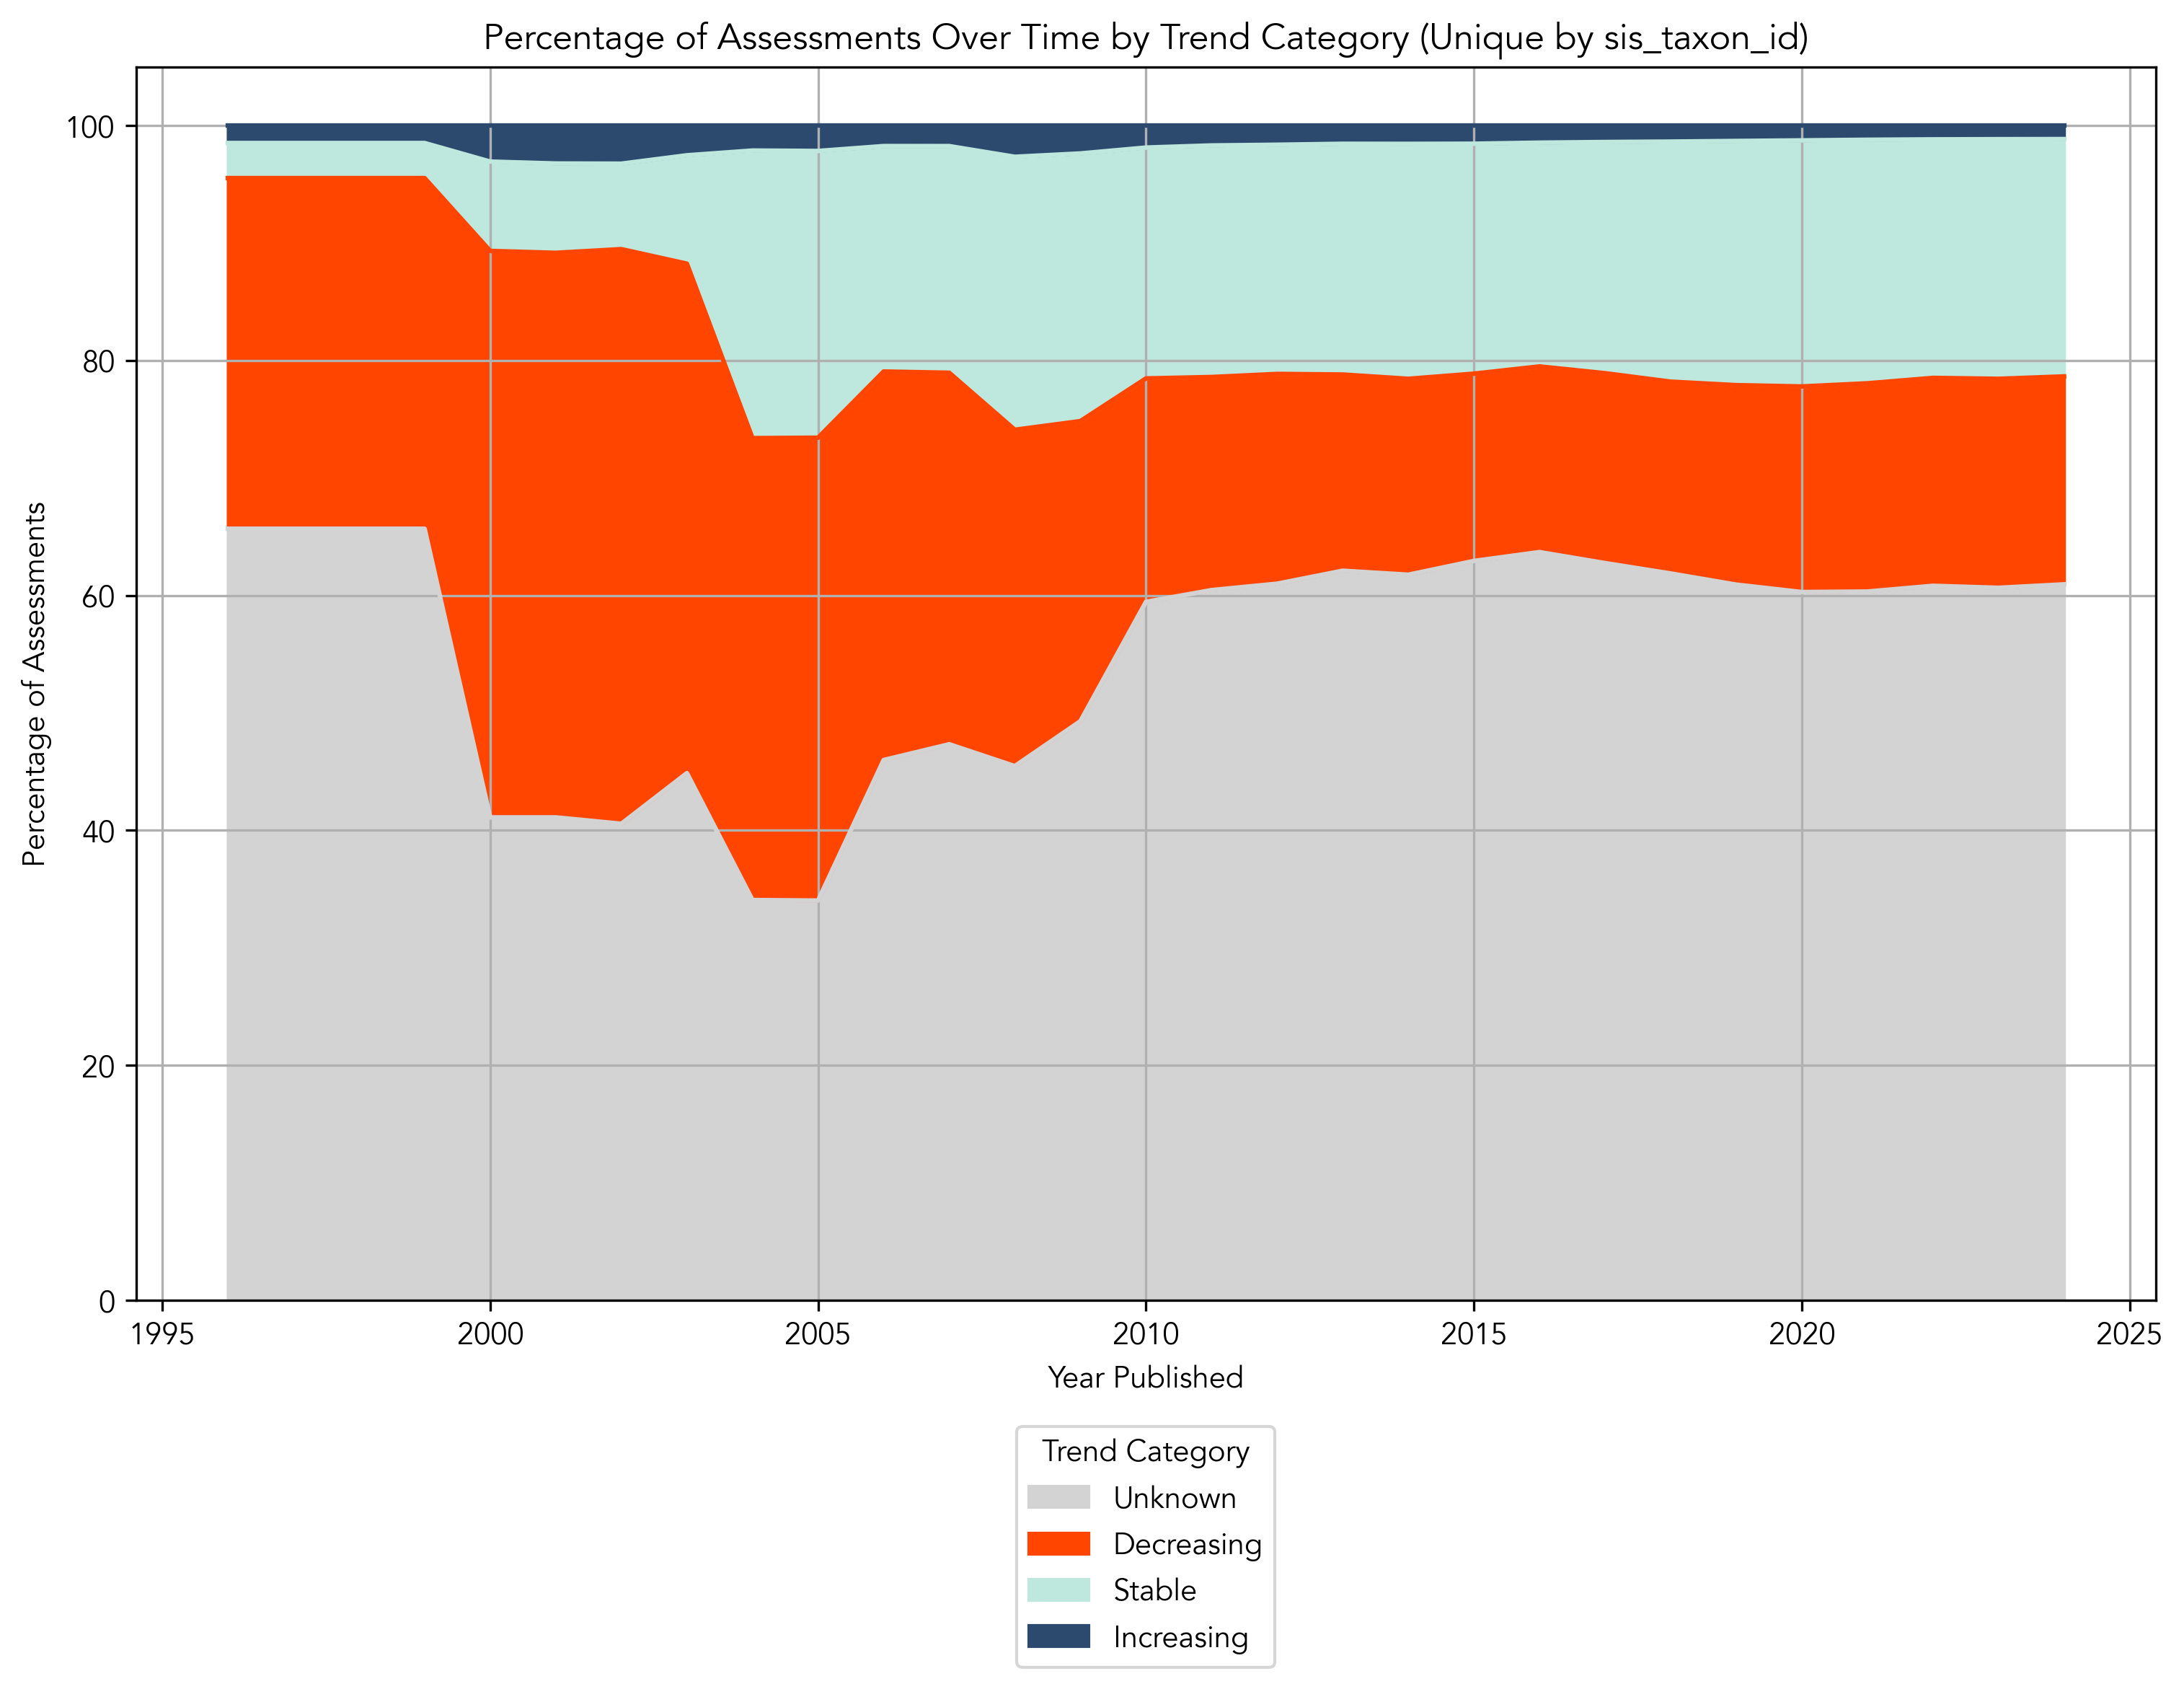

In [64]:
population_trends_df = df_combined
population_trends_df["trend_title"] = "None"
population_trends_df.loc[population_trends_df["trend"] == 0, 'trend_title'] = "Increasing"
population_trends_df.loc[population_trends_df["trend"] == 1, 'trend_title'] = "Decreasing"
population_trends_df.loc[population_trends_df["trend"] == 2, 'trend_title'] = "Stable"
population_trends_df.loc[population_trends_df["trend"] == 3, 'trend_title'] = "Unknown"

# Group by year and Threat and count the number of assessments
df_grouped = population_trends_df.groupby(['year_published', 'trend_title']).size().reset_index(name='count')

# Create a pivot table to have Threat categories as columns
df_pivot = df_grouped.pivot(index='year_published', columns='trend_title', values='count').fillna(0)

# Specify the desired order of Threat categories
trend_order = ['Unknown', 'Decreasing', 'Stable', 'Increasing']
df_pivot = df_pivot[trend_order]

# Convert counts to percentages
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Create a custom colormap
colors = ["#d3d3d3", "#ff4500", "#bee7dd", "#2b4a6d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(trend_order))

# Create the figure with specified DPI
plt.figure(figsize=(12, 8), dpi=300)

# Plot the stacked area chart of assessments over time for each threat category
df_percentage.plot(kind='area', stacked=True, colormap=cmap, ax=plt.gca())

plt.title('Percentage of Assessments Over Time by Trend Category (Unique by sis_taxon_id)')
plt.xlabel('Year Published')
plt.ylabel('Percentage of Assessments')

# Adjust the legend position to fit within the figure
plt.legend(title='Trend Category', bbox_to_anchor=(0.5, -0.2), loc='center')
plt.grid(True)

# Adjust layout to make sure everything fits well within the figure
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Set the font to Avenir
plt.rcParams['font.family'] = 'Avenir'

# Save the figure as an SVG file
plt.savefig('../Figures/IUCN_trends.svg', format='svg')

plt.show()


In [67]:
population_trends_df

,year_published,trend,sis_taxon_id,trend_title
0,2011.0,1.0,9,Decreasing
1,2012.0,1.0,9,Decreasing
2,2013.0,1.0,9,Decreasing
3,2014.0,1.0,9,Decreasing
4,2015.0,1.0,9,Decreasing
...,...,...,...,...
635998,2023.0,3.0,252266143,Unknown
635999,2024.0,3.0,252266143,Unknown
636000,2024.0,3.0,255004594,Unknown
636001,2024.0,3.0,257548227,Unknown


## Aggregated threat counts

In [12]:
# import requests
# import pandas as pd

# # Define the base URL and your API token
# base_url = "https://api.iucnredlist.org/api/v4/threats/"
# token = "TVXuHMNVpyvNRFTdwx8SED3kt5mPNJ3W1QJL"

# # Set up the headers with the token
# headers = {
#     "accept": "application/json",
#     "Authorization": token
# }

# # Initialize variables for storing all threats
# all_threats = []

# # Function to get threats for a given threat code
# def get_threats(threat_code):
#     page = 1
#     per_page = 1000
#     threats = []
    
#     while True:
#         print(f"Threat Code: {threat_code}, Page: {page}")
#         # Construct the URL with pagination parameters
#         url = f"{base_url}{threat_code}?page={page}&per_page={per_page}"
        
#         # Make the GET request
#         response = requests.get(url, headers=headers)
        
#         # Check if the request was successful
#         if response.status_code == 200:
#             data = response.json()
#             threats.extend(data.get('assessments', []))
            
#             # Add assessments to the list with the threat category
#             for threat in threats:
#                 threat["threat_code"] = threat_code
            
#             # Check if we have reached the last page
#             total_pages = int(response.headers.get('total-pages', 1))
#             if page >= total_pages:
#                 break
            
#             # Move to the next page
#             page += 1
#         else:
#             print(f"Failed to retrieve data for threat code {threat_code}: {response.status_code} - {response.text}")
#             break
            
#     return threats

# # Iterate through main categories (1 to 12), subcategories (1 to 10), and sub-subcategories (1 to 20)
# for threat_code in range(1, 13):
#     # Get threats for the main category
#     all_threats.extend(get_threats(threat_code))
    
#     # Check for subcategories (1 to 10)
#     for sub_code in range(1, 11):
#         sub_threat_code = f"{threat_code}_{sub_code}"
#         all_threats.extend(get_threats(sub_threat_code))
        
#         # Check for sub-subcategories (1 to 20)
#         for sub_sub_code in range(1, 21):
#             sub_sub_threat_code = f"{sub_threat_code}_{sub_sub_code}"
#             all_threats.extend(get_threats(sub_sub_threat_code))

# # Extract relevant information for each threat
# rows = []
# for threat in all_threats:
#     row = {
#         "year_published": threat.get("year_published"),
#         "sis_taxon_id": threat.get("sis_taxon_id"),
#         "threat_code": threat.get("threat_code")
#     }
#     rows.append(row)

# # Create a DataFrame
# threats_df = pd.DataFrame(rows)

# threats_df.to_csv("IUCN_threats.csv")

# # Display the DataFrame
# threats_df

In [13]:
threats_df = pd.read_csv("IUCN_threats.csv")

In [14]:
import requests
import pandas as pd

# Define the base URL and your API token
base_url = "https://api.iucnredlist.org/api/v4/threats/"
token = "TVXuHMNVpyvNRFTdwx8SED3kt5mPNJ3W1QJL"

# Set up the headers with the token
headers = {
    "accept": "application/json",
    "Authorization": token
}

# Initialize a list to store all threats
all_threats = []

# Function to get threats
def get_threats():
    page = 1
    per_page = 1000
    threats = []

    while True:
        print(f"Page: {page}")
        # Construct the URL with pagination parameters
        url = f"{base_url}?page={page}&per_page={per_page}"

        # Make the GET request
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            threats.extend(data.get('threats', []))

            # Check if we have reached the last page
            total_pages = int(response.headers.get('total-pages', 1))
            if page >= total_pages:
                break

            # Move to the next page
            page += 1
        else:
            print(f"Failed to retrieve data: {response.status_code} - {response.text}")
            break

    return threats

# Retrieve all threats
all_threats = get_threats()

# Convert the threats to a pandas DataFrame
all_threats = pd.DataFrame(all_threats)

# Process the threat descriptions to extract the English description
all_threats['description'] = all_threats['description'].apply(lambda x: x['en'] if 'en' in x else x)

# Rename columns for better readability
all_threats.rename(columns={'code': 'threat_code', 'description': 'Threat Description'}, inplace=True)

# Print the DataFrame
all_threats


Page: 1


,Threat Description,threat_code
0,Residential & commercial development,1
1,Housing & urban areas,1_1
2,Commercial & industrial areas,1_2
3,Tourism & recreation areas,1_3
4,Agriculture & aquaculture,2
...,...,...
125,Temperature extremes,11_3
126,Storms & flooding,11_4
127,Other impacts,11_5
128,Other options,12


In [15]:
# Initialize an empty list to store new rows
new_rows = []

# Define the range of years
years = range(1997, 2025)

df_combined = threats_df.merge(marine_df["sis_taxon_id"],on="sis_taxon_id",how="inner")
df_combined = df_combined.drop_duplicates(subset=['year_published', 'sis_taxon_id', "threat_code"])

# Iterate through each sis_taxon_id
for sis_taxon_id in tqdm(df_combined['sis_taxon_id'].unique()):
    # Filter data for the current sis_taxon_id
    df_sis = df_combined[df_combined['sis_taxon_id'] == sis_taxon_id]
    
    # Iterate through each year in the defined range
    for year in years:
        # Check if there is an entry for the current year
        if year not in df_sis['year_published'].values:
            # Find the most recent threat categorization from a previous year
            previous_threats = df_sis[df_sis['year_published'] < year]
            if not previous_threats.empty:
                last_threat = previous_threats.iloc[-1]['threat_code']
                # Create a new row with the current year, sis_taxon_id, and the most recent threat categorization
                new_row = {
                    'year_published': year,
                    'threat_code': last_threat,
                    'sis_taxon_id': sis_taxon_id
                }
                new_rows.append(new_row)

# Create a DataFrame from the new rows
df_new_rows = pd.DataFrame(new_rows)

# Append the new rows to the original dataframe
df_combined = pd.concat([df_combined, df_new_rows])

# Sort the combined dataframe
df_combined = df_combined.sort_values(by=['sis_taxon_id', 'year_published']).reset_index(drop=True)

df_combined


100%|████████████████████████████████████| 28133/28133 [01:23<00:00, 337.87it/s]


,Unnamed: 0,year_published,sis_taxon_id,threat_code
0,225288.0,2011.0,9,5_4_1
1,293471.0,2011.0,9,7_2_10
2,NaN,2012.0,9,7_2_10
3,NaN,2013.0,9,7_2_10
4,NaN,2014.0,9,7_2_10
...,...,...,...,...
459964,14648.0,2024.0,257548227,1_1
459965,38939.0,2024.0,257548227,1_2
459966,14647.0,2024.0,257549542,1_1
459967,236129.0,2024.0,257549542,5_4_3


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_combined = df_combined.merge(all_threats, on="threat_code", how="inner")

# Define a function to map threat_code to Threat
def map_threat(threat_code):
    if threat_code.startswith('1_'):
        return 'Residential & commercial development'
    elif threat_code.startswith('2_'):
        return 'Agriculture & aquaculture'
    elif threat_code.startswith('3'):
        return 'Energy production & mining'
    elif threat_code.startswith('4_'):
        return 'Transportation & service corridors'
    elif threat_code.startswith('5_'):
        return 'Biological resource use'
    elif threat_code.startswith('6'):
        return 'Human intrusions & disturbance'
    elif threat_code.startswith('7_'):
        return 'Natural system modifications'
    elif threat_code.startswith('8_'):
        return 'Invasive and other problematic species, genes & diseases'
    elif threat_code.startswith('9_'):
        return 'Pollution'
    elif threat_code.startswith('10_'):
        return 'Geological events'
    elif threat_code.startswith('11_'):
        return 'Climate change & severe weather'
    elif threat_code.startswith('12_'):
        return 'Other'
    else:
        return 'Unknown'  # for any other threat codes

# Apply the function to create the new Threat column
df_combined['Threat'] = df_combined['threat_code'].apply(map_threat)

In [19]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Query the latest data for the year 2024
df_latest = df_combined.query("year_published == 2024")

# Group by Threat and Threat Description and count the number of assessments
df_grouped = df_latest.groupby(['Threat', 'Threat Description']).size().reset_index(name='count')

# Calculate the percentages
df_grouped['percentage'] = df_grouped['count'] / df_grouped['count'].sum() * 100

# Create a unique color for each Threat
unique_threats = df_grouped['Threat'].unique()
color_map = {threat: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, threat in enumerate(unique_threats)}

# Assign colors to each row based on the Threat
df_grouped['color'] = df_grouped['Threat'].map(color_map)

# Create the sunburst plot
fig = px.sunburst(
    df_grouped,
    path=['Threat', 'Threat Description'],
    values='percentage',
    color='Threat',
    color_discrete_map=color_map,
    hover_data=['count'],
    title='Sunburst Plot of Threat Assessments for 2024',
    width=1000,  # Set the width of the plot
    height=800   # Set the height of the plot
)

# Update the layout to set the font to Avenir
fig.update_layout(
    font=dict(
        family="Avenir",
        size=12
    )
)

# Save the figure as an SVG file
pio.write_image(fig, "../Figures/sunburst_plot.svg", format='svg')

# Show the plot
fig.show()


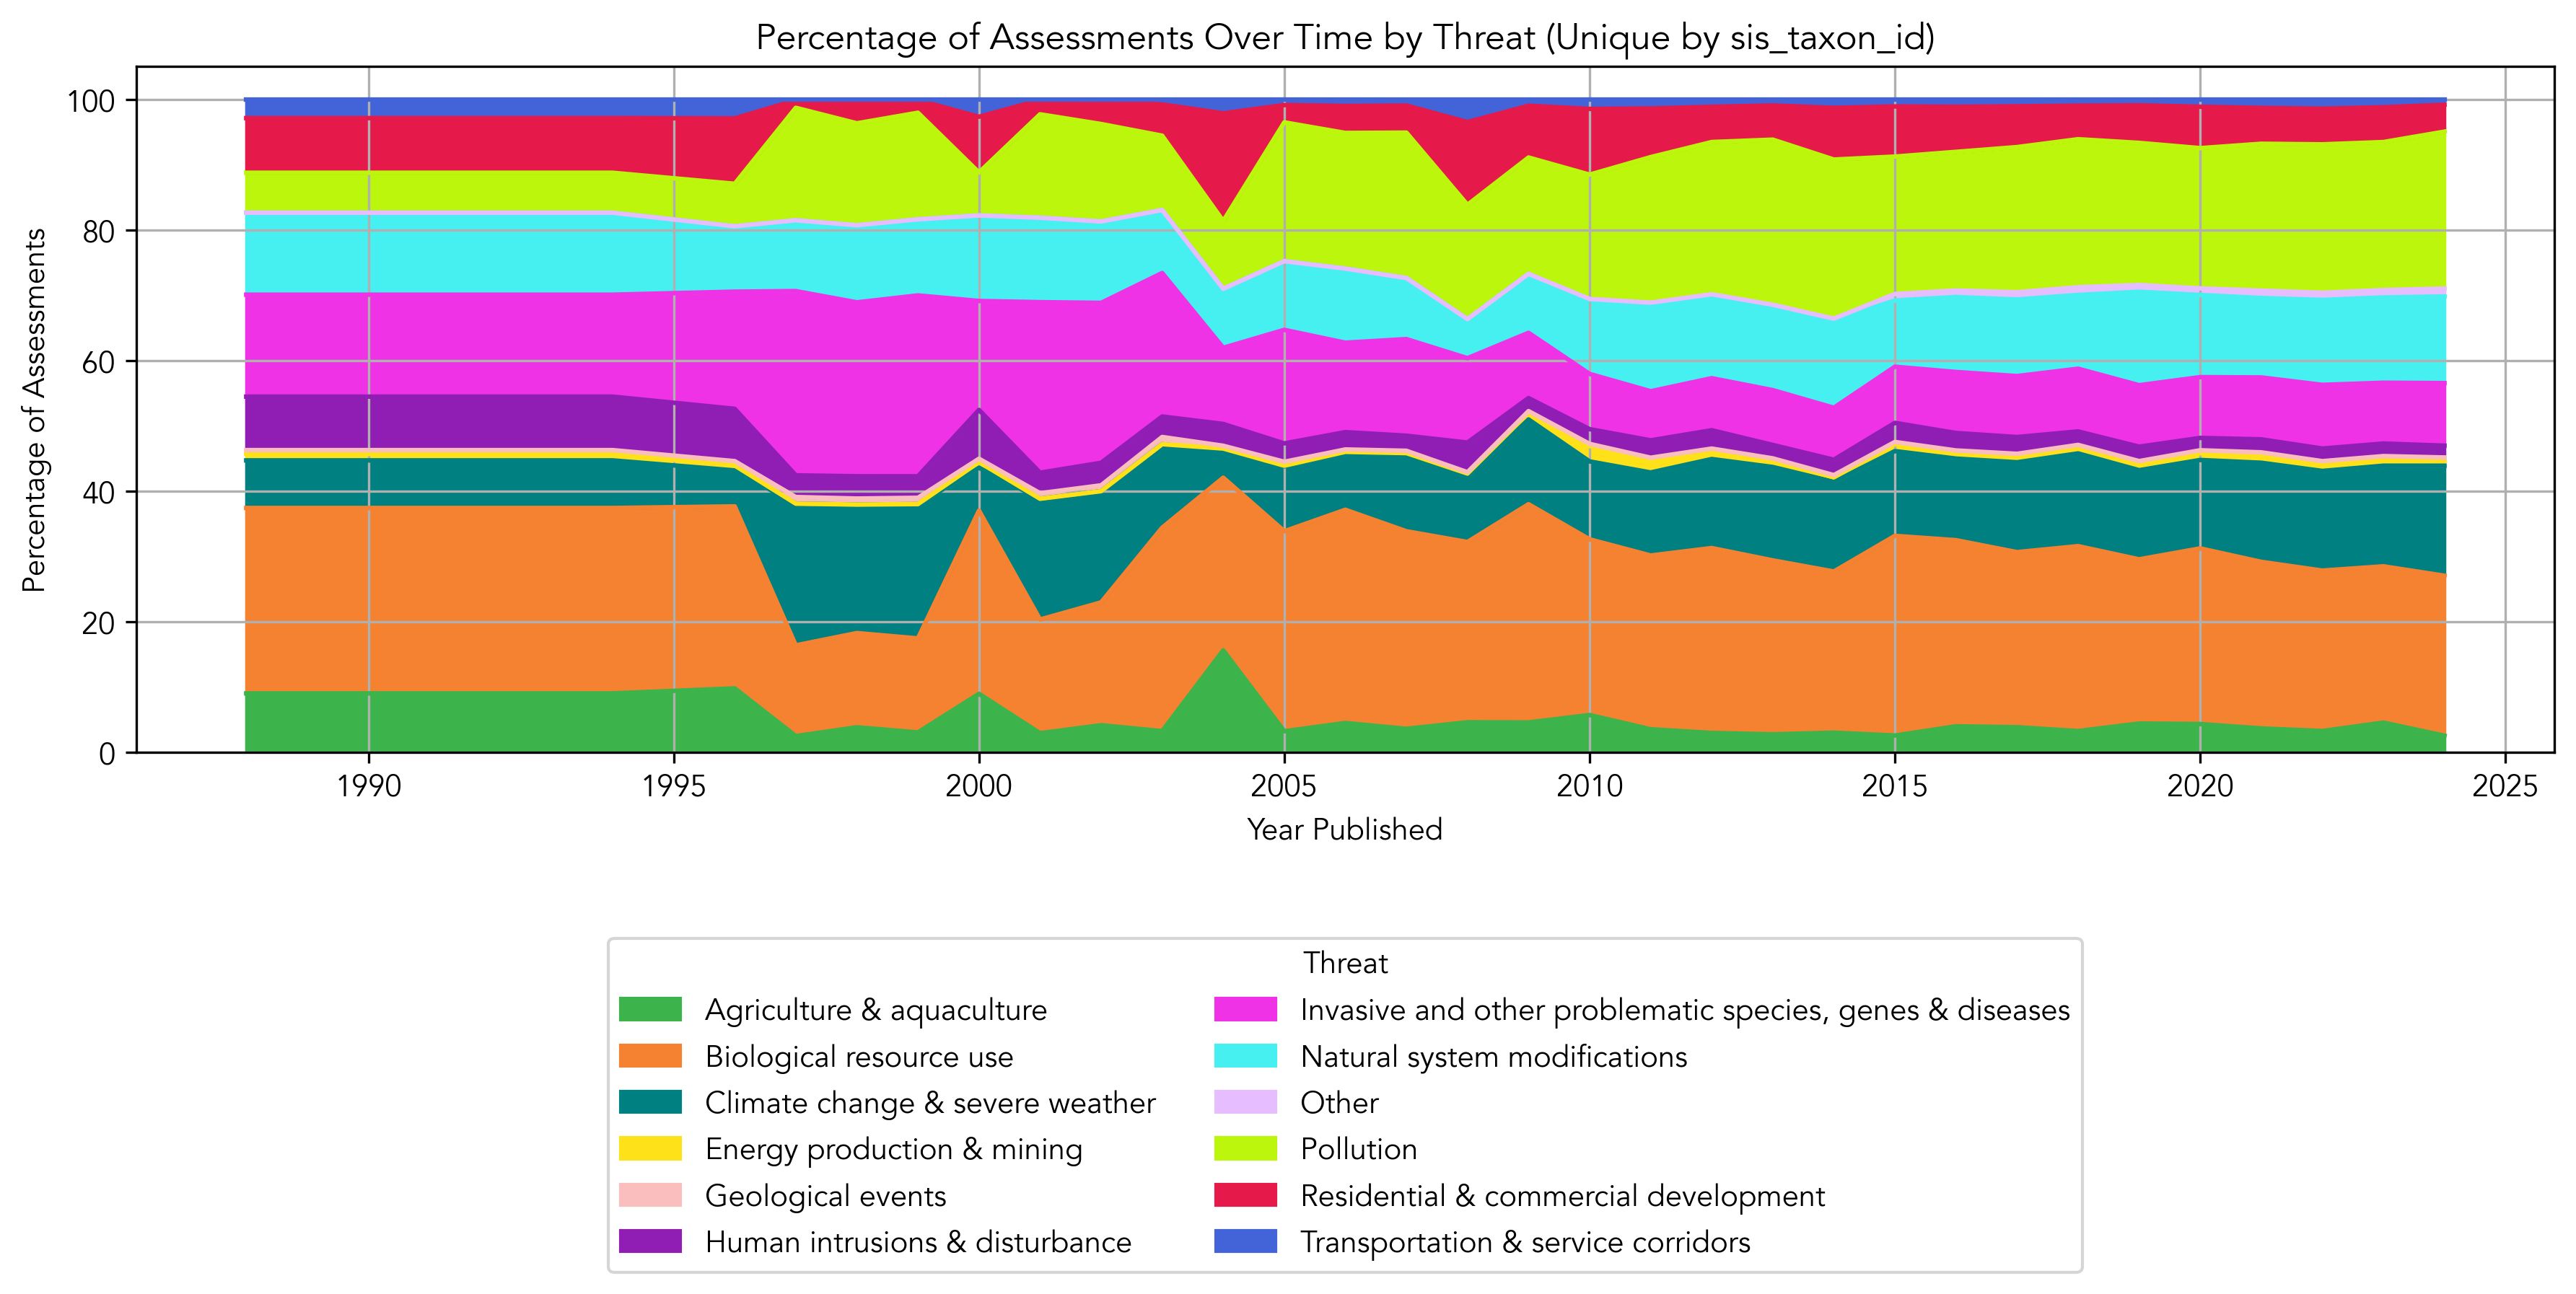

In [292]:
# Group by year and Threat and count the number of assessments
df_grouped = df_combined.groupby(['year_published', 'Threat', 'Threat Description']).size().reset_index(name='count')

# Create a pivot table to have Threat categories as columns
df_pivot = df_grouped.pivot(index='year_published', columns=['Threat', 'Threat Description'], values='count').fillna(0)

# Convert counts to percentages
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Define unique colors for each Threat category
colors = {
    'Residential & commercial development': '#e6194b',
    'Agriculture & aquaculture': '#3cb44b',
    'Energy production & mining': '#ffe119',
    'Transportation & service corridors': '#4363d8',
    'Biological resource use': '#f58231',
    'Human intrusions & disturbance': '#911eb4',
    'Natural system modifications': '#46f0f0',
    'Invasive and other problematic species, genes & diseases': '#f032e6',
    'Pollution': '#bcf60c',
    'Geological events': '#fabebe',
    'Climate change & severe weather': '#008080',
    'Other': '#e6beff',
    'Unknown': '#9a6324'
}

# Create the figure with specified DPI
plt.figure(figsize=(12, 8), dpi=300)

# Plot the stacked area chart of assessments over time for each threat category
df_percentage.plot(kind='area', stacked=True, ax=plt.gca(), color=[colors[col] for col in df_percentage.columns])

plt.title('Percentage of Assessments Over Time by Threat (Unique by sis_taxon_id)')
plt.xlabel('Year Published')
plt.ylabel('Percentage of Assessments')

# Move the legend underneath the plot
plt.legend(title='Threat', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2)
plt.grid(True)

# Adjust layout to make sure everything fits well within the figure
plt.tight_layout(rect=[0, 0, 1, 0.85])

# Set the font to Avenir
plt.rcParams['font.family'] = 'Avenir'

# Save the figure as an SVG file
plt.savefig('../Figures/IUCN_threats.svg', format='svg')

plt.show()

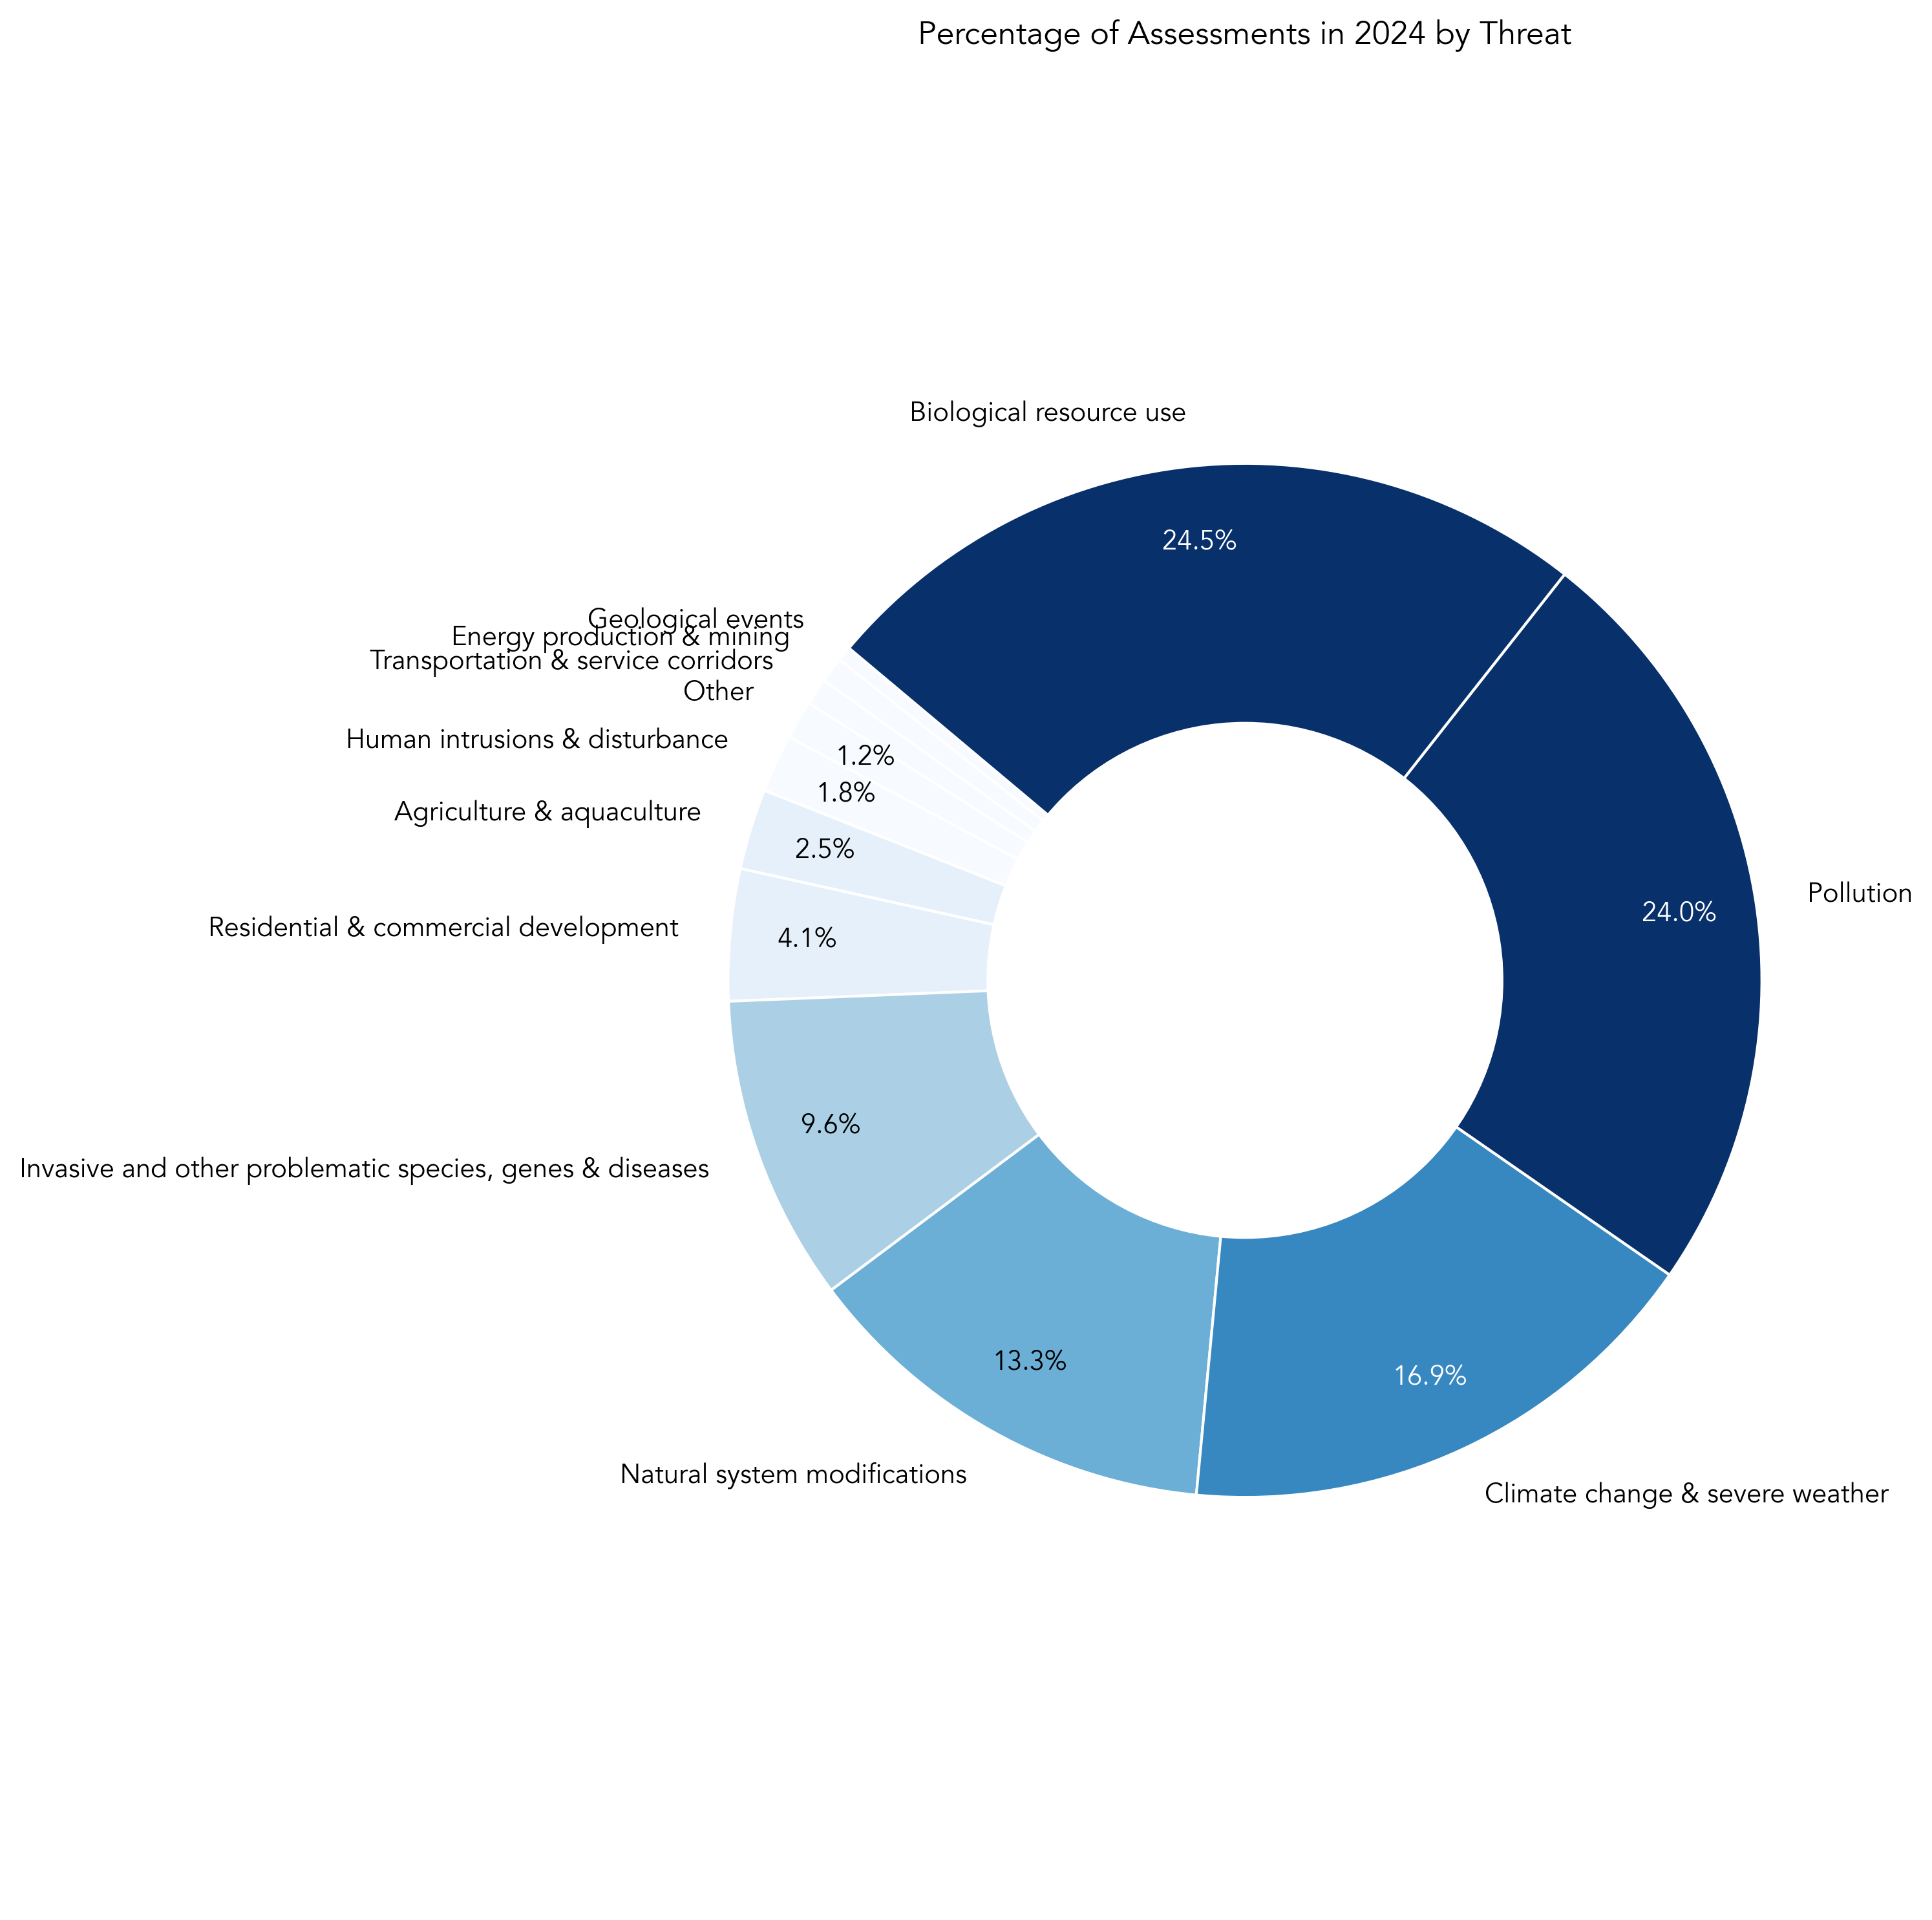

In [293]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys

# Filter the data for the year 2024
df_2024 = df_combined[df_combined['year_published'] == 2024]

# Group by Threat and count the number of assessments
df_grouped_2024 = df_2024.groupby('Threat').size().reset_index(name='count')

# Sort the values by count in ascending order (to have darkest colors at the beginning)
df_grouped_2024 = df_grouped_2024.sort_values(by='count', ascending=True)

# Create a color map ranging from darker blue to light blue
cmap = plt.cm.get_cmap('Blues', 13)  # Adjust the number of shades here
norm = mcolors.Normalize(vmin=df_grouped_2024['count'].min(), vmax=df_grouped_2024['count'].max())
colors = [cmap(norm(value)) for value in df_grouped_2024['count']]

# Function to format autopct with white text for dark colors and skip percentages less than 1%
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%' if pct > 1 else ''  # Return empty string for percentages less than 1%
    return my_format

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
wedges, texts, autotexts = ax.pie(df_grouped_2024['count'], labels=df_grouped_2024['Threat'], colors=colors,
                                  autopct=autopct_format(df_grouped_2024['count']), startangle=140, pctdistance=0.85,wedgeprops={'edgecolor': 'white'})

# Iterate over the text objects and set the color based on slice color luminance
for autotext, color in zip(autotexts, colors):
    # Convert RGB to HLS (Hue, Lightness, Saturation)
    r, g, b = color[:3]
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    # Set text color based on slice color luminance
    if l < 0.5:  # Dark colors
        autotext.set_color('white')
    else:  # Light colors
        autotext.set_color('black')

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.50,fc='white')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set the font to Avenir
plt.rcParams['font.family'] = 'Avenir'

ax.set_title('Percentage of Assessments in 2024 by Threat')
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig('../Figures/IUCN_threats_2024_pie.svg', format='svg')

plt.show()
